In [52]:
import time
import warnings
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from optbinning import OptimalBinning
from joblib import Parallel, delayed
warnings.filterwarnings('ignore')

In [53]:
train = pd.read_parquet('train_seg2.parquet')
oos = pd.read_parquet('oos_seg2.parquet')
oot = pd.read_parquet('oot_seg2.parquet')

In [54]:
target_col = "BAD_NEXT_12M"
train[target_col] = train[target_col].astype(int)

In [55]:
train.columns

Index(['C_GIOITINH', 'TRINHDO', 'TTHONNHAN', 'SOHUUNHA', 'NHANVIENBIDV',
       'BASE_AUM', 'TUOI', 'INCOME', 'CBAL', 'CBALORG', 'AFLIMT_MAX',
       'AFLIMT_MIN', 'AFLIMT_AVG', 'CBAL_AVG', 'CBAL_MAX', 'CBAL_MIN',
       'COLLATERAL_VALUE', 'LTV', 'N_AVG_DEPOSIT_12M', 'N_AVG_DEPOSIT_6M',
       'N_AVG_DD_12M', 'N_AVG_CD_12M', 'FLAG_SALARY_ACC', 'FLAG_DEPOSIT',
       'UTILIZATION_RATE', 'CNT_CREDIT_CARDS', 'AMT_CASH_ADVANCE_12M',
       'FLAG_CASH_ADVANCE', 'PCT_PAYMENT_TO_BALANCE', 'CNT_MIN_PAY_6M',
       'AVG_DAYS_PAST_DUE', 'DTI_RATIO', 'PTI_RATIO', 'MOB',
       'CNT_OTHER_PRODUCTS', 'LIMIT_TO_INCOME', 'AMT_VAR_6M',
       'CBAL_SHORTTERM_LOAN', 'CBAL_LONGTERM_LOAN', 'CNT_DPD_30PLUS_6M',
       'OCCUPATION_TYPE', 'DURATION_MAX', 'REMAINING_DURATION_MAX',
       'TIME_TO_OP_MAX', 'RATE_AVG', 'PURCOD_MAX', 'PURCOD_MIN', 'MAX_DPD_12M',
       'MAX_DPD_12M_OBS', 'AVG_OD_DPD_12M', 'SUM_ALL_OD_12M',
       'N_AVG_OVERDUE_CBAL_12M', 'CBAL_TO_INC_12MON', 'REAL_GDP_GROWTH_12M',
       'BAD

Binning 

Skip SOHUUNHA: Biến hằng số (1 unique value)
Skip AVG_OD_DPD_12M: Biến hằng số (1 unique value)

Processing: C_GIOITINH
   -> STATUS: OPTIMAL
   -> IV: 0.0001
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[F],98083,0.48645,94127,3956,0.040333,0.00863,0.000036,0.000005
1,"[M, O]",103547,0.51355,99303,4244,0.040986,-0.008112,0.000034,0.000004
2,Special,0,0.00000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.00000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,201630,1.00000,193430,8200,0.040669,,0.000070,0.000009


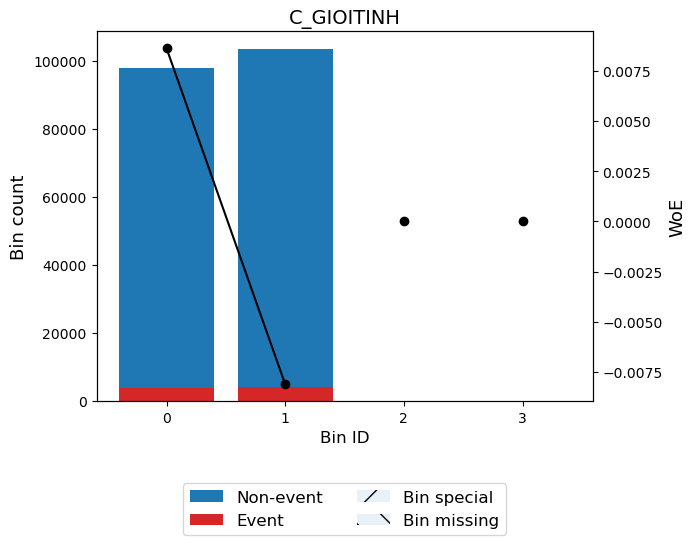


Processing: TRINHDO
   -> STATUS: OPTIMAL
   -> IV: 0.1054
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[4.0, 3.0]",37055,0.183777,36233,822,0.022183,0.625204,0.054439,0.006696
1,"[2.0, nan]",108638,0.538799,104527,4111,0.037841,0.074998,0.002928,0.000366
2,[1.0],55937,0.277424,52670,3267,0.058405,-0.380608,0.048002,0.005964
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,201630,1.000000,193430,8200,0.040669,,0.105370,0.013026


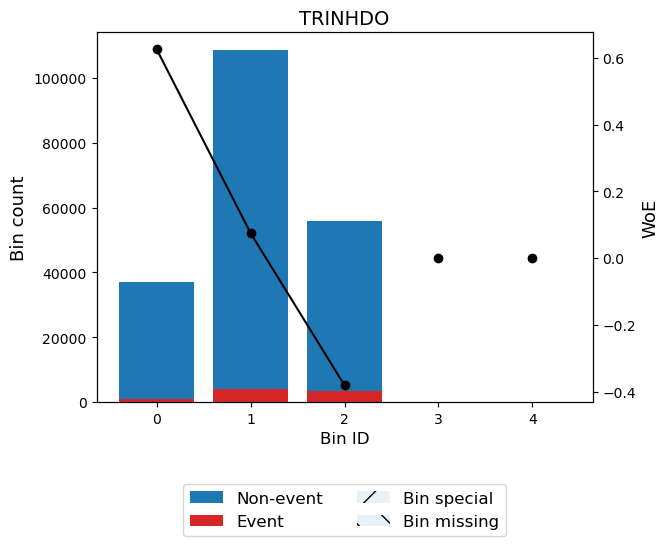


Processing: TTHONNHAN
   -> STATUS: OPTIMAL
   -> IV: 0.0053
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[Married],108258,0.536914,104140,4118,0.038039,0.069587,0.002518,0.000315
1,[Single],93372,0.463086,89290,4082,0.043718,-0.075479,0.002732,0.000341
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,201630,1.000000,193430,8200,0.040669,,0.005250,0.000656


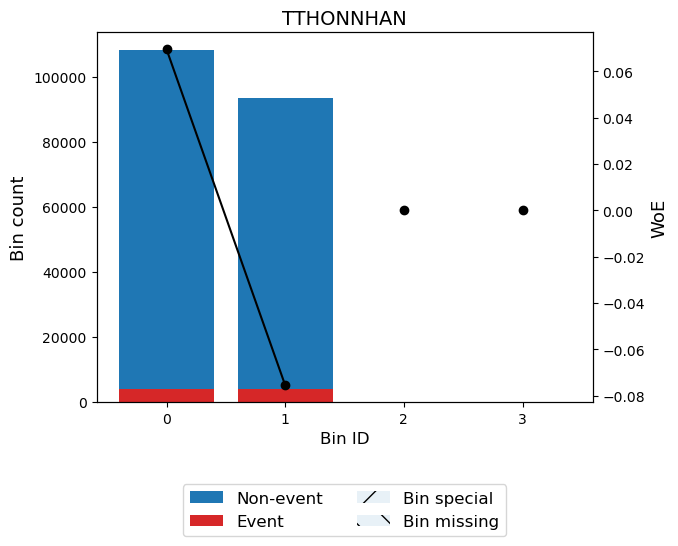


Processing: NHANVIENBIDV
   -> STATUS: OPTIMAL
   -> IV: 0.0000
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, inf)",201630,1.0,193430,8200,0.040669,-0.0,0.0,0.0
1,Special,0,0.0,0,0,0.000000,0.0,0.0,0.0
2,Missing,0,0.0,0,0,0.000000,0.0,0.0,0.0
Totals,,201630,1.0,193430,8200,0.040669,,0.0,0.0


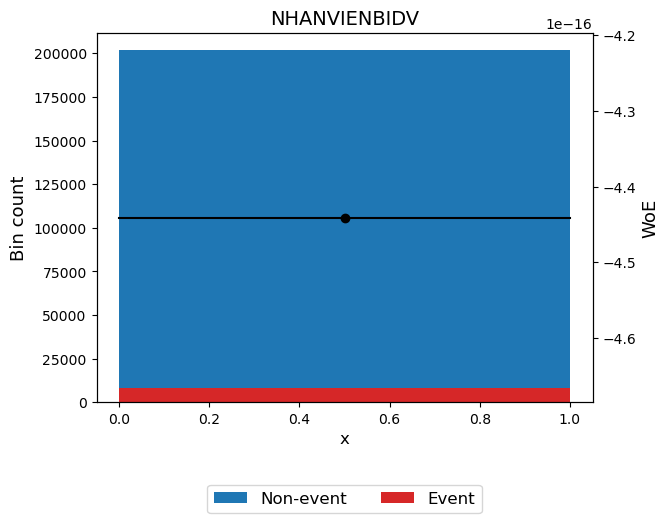


Processing: BASE_AUM
   -> STATUS: OPTIMAL
   -> IV: 0.0531
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 1556872.50)",24671,0.122358,23098,1573,0.063759,-0.47402,0.034327,0.004251
1,"[1556872.50, 2836312.50)",41106,0.203868,39256,1850,0.045006,-0.105863,0.002399,0.000300
2,"[2836312.50, 3929434.00)",31961,0.158513,30773,1188,0.037170,0.093585,0.001330,0.000166
3,"[3929434.00, 7258944.00)",57718,0.286257,55634,2084,0.036107,0.123724,0.004141,0.000517
4,"[7258944.00, inf)",46174,0.229004,44669,1505,0.032594,0.229705,0.010887,0.001358
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,201630,1.000000,193430,8200,0.040669,,0.053084,0.006592


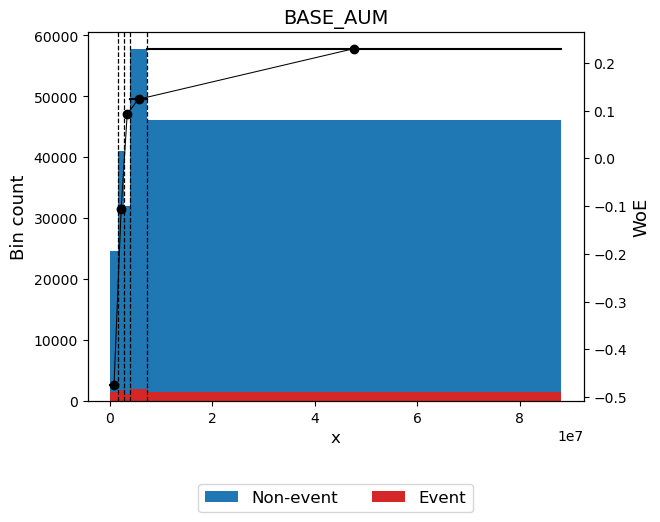


Processing: TUOI
   -> STATUS: OPTIMAL
   -> IV: 0.0229
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 30.50)",25998,0.128939,24546,1452,0.055850,-0.333175,0.016717,0.002080
1,"[30.50, 34.50)",26933,0.133576,25780,1153,0.042810,-0.05355,0.000393,0.000049
2,"[34.50, 39.50)",44280,0.219610,42515,1765,0.039860,0.020925,0.000095,0.000012
3,"[39.50, inf)",104419,0.517874,100589,3830,0.036679,0.107397,0.005687,0.000711
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
5,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,201630,1.000000,193430,8200,0.040669,,0.022892,0.002852


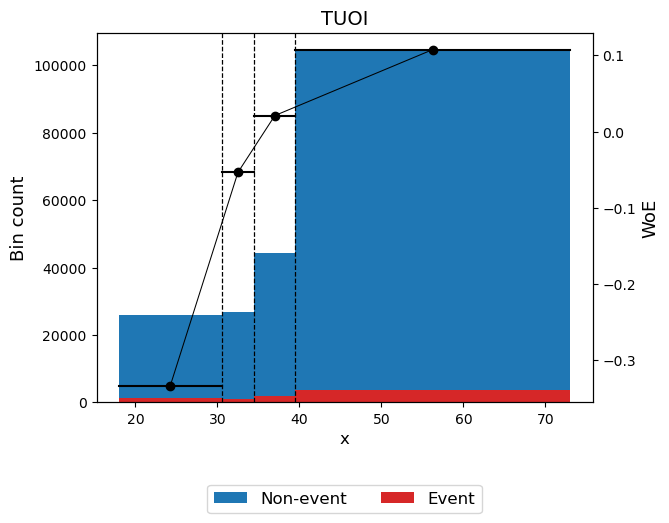


Processing: INCOME
   -> STATUS: OPTIMAL
   -> IV: 0.2434
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 15006313.50)",21851,0.108372,19560,2291,0.104846,-1.016283,0.181171,0.021720
1,"[15006313.50, 21112098.00)",73523,0.364643,70873,2650,0.036043,0.125548,0.005428,0.000678
2,"[21112098.00, 25166660.00)",45419,0.225259,43899,1520,0.033466,0.2024,0.008417,0.001050
3,"[25166660.00, 29792464.00)",25366,0.125805,24615,751,0.029607,0.328924,0.011733,0.001460
4,"[29792464.00, inf)",25391,0.125929,24824,567,0.022331,0.618425,0.036604,0.004504
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,10080,0.049993,9659,421,0.041766,-0.027769,0.000039,0.000005
Totals,,201630,1.000000,193430,8200,0.040669,,0.243391,0.029417


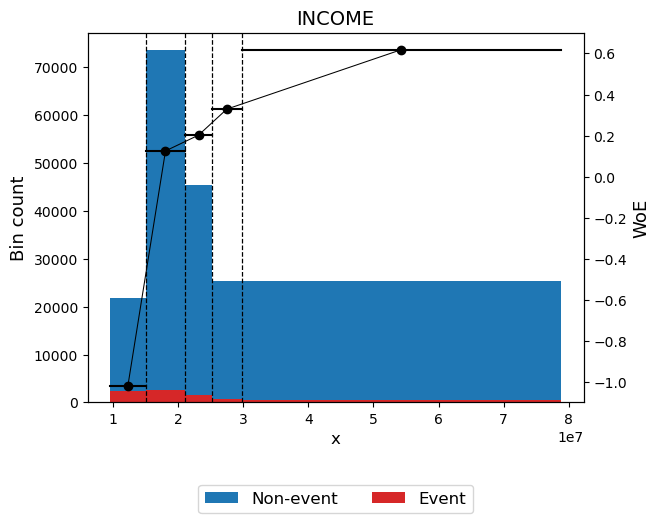


Processing: CBAL
   -> STATUS: OPTIMAL
   -> IV: 0.0474
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 145506112.00)",21779,0.108015,21319,460,0.021121,0.675346,0.036548,0.004484
1,"[145506112.00, 202087592.00)",26845,0.133140,25892,953,0.035500,0.141293,0.002492,0.000311
2,"[202087592.00, 250729800.00)",24186,0.119952,23174,1012,0.041842,-0.029679,0.000107,0.000013
3,"[250729800.00, 576846048.00)",99501,0.493483,95144,4357,0.043789,-0.077174,0.003046,0.000381
4,"[576846048.00, inf)",29319,0.145410,27901,1418,0.048365,-0.181366,0.005202,0.000649
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,201630,1.000000,193430,8200,0.040669,,0.047395,0.005838


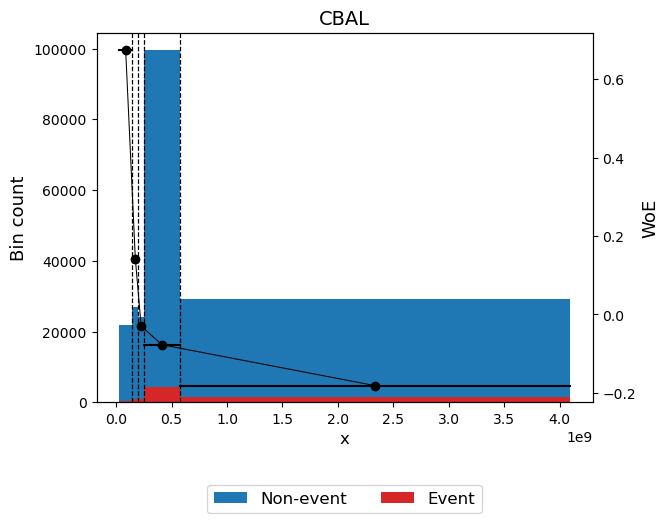


Processing: CBALORG
   -> STATUS: OPTIMAL
   -> IV: 0.0465
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 174763072.00)",27971,0.138724,27329,642,0.022952,0.590334,0.037187,0.004582
1,"[174763072.00, 223100288.00)",21294,0.105609,20508,786,0.036912,0.100832,0.001025,0.000128
2,"[223100288.00, 277877072.00)",24643,0.122219,23605,1038,0.042121,-0.036619,0.000167,0.000021
3,"[277877072.00, 703825568.00)",105780,0.524624,101114,4666,0.044110,-0.084835,0.003926,0.000491
4,"[703825568.00, inf)",21942,0.108823,20874,1068,0.048674,-0.188065,0.004199,0.000524
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,201630,1.000000,193430,8200,0.040669,,0.046505,0.005746


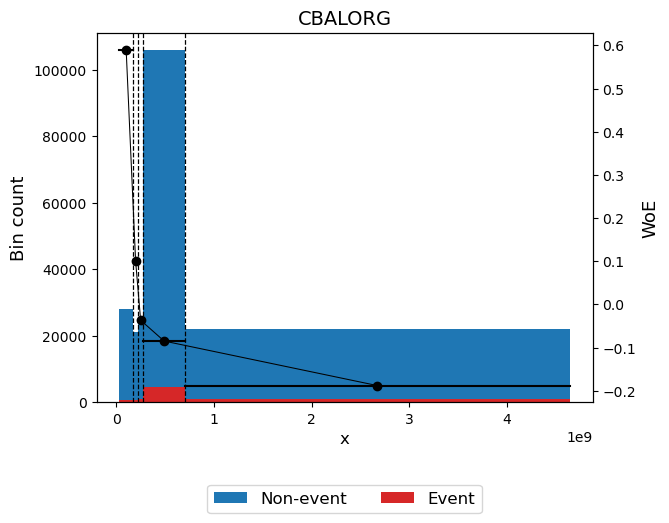


Processing: AFLIMT_MAX
   -> STATUS: OPTIMAL
   -> IV: 0.0778
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 479281376.00)",33745,0.167361,31515,2230,0.066084,-0.512319,0.055855,0.006907
1,"[479281376.00, 570845984.00)",34542,0.171314,33092,1450,0.041978,-0.033054,0.000190,0.000024
2,"[570845984.00, 645743712.00)",29375,0.145688,28375,1000,0.034043,0.184727,0.004571,0.000571
3,"[645743712.00, inf)",103968,0.515638,100448,3520,0.033857,0.190398,0.017142,0.002139
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
5,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,201630,1.000000,193430,8200,0.040669,,0.077757,0.009640


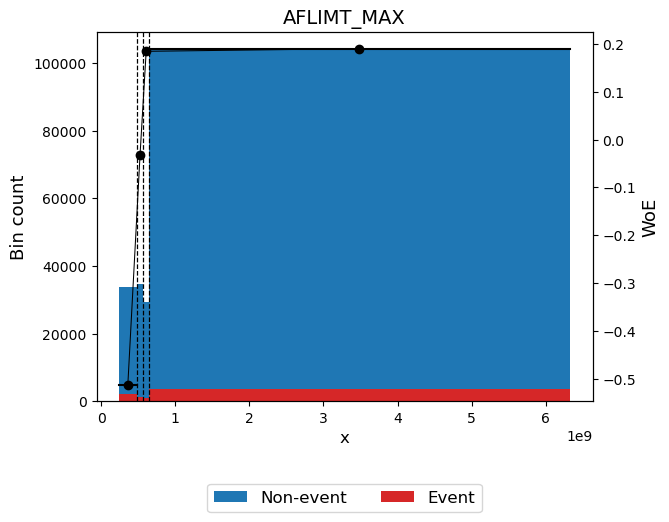


Processing: AFLIMT_MIN
   -> STATUS: OPTIMAL
   -> IV: 0.0778
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 431353232.00)",33745,0.167361,31515,2230,0.066084,-0.512319,0.055855,0.006907
1,"[431353232.00, 513761376.00)",34542,0.171314,33092,1450,0.041978,-0.033054,0.000190,0.000024
2,"[513761376.00, 581169312.00)",29375,0.145688,28375,1000,0.034043,0.184727,0.004571,0.000571
3,"[581169312.00, inf)",103968,0.515638,100448,3520,0.033857,0.190398,0.017142,0.002139
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
5,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,201630,1.000000,193430,8200,0.040669,,0.077757,0.009640


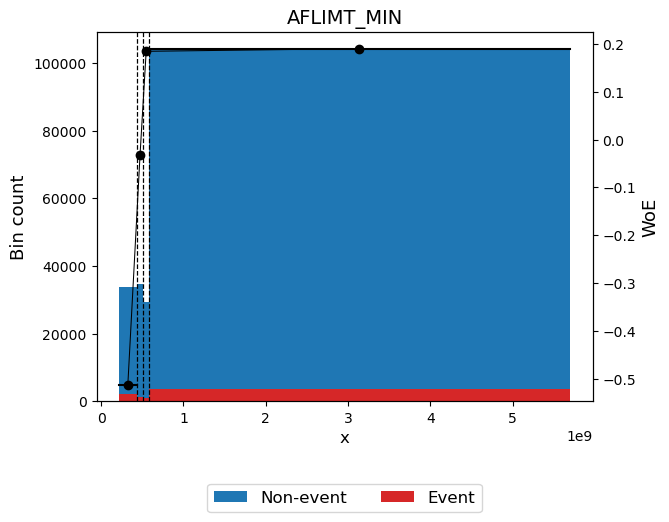


Processing: AFLIMT_AVG
   -> STATUS: OPTIMAL
   -> IV: 0.0778
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 455317296.00)",33745,0.167361,31515,2230,0.066084,-0.512319,0.055855,0.006907
1,"[455317296.00, 542303680.00)",34542,0.171314,33092,1450,0.041978,-0.033054,0.000190,0.000024
2,"[542303680.00, 613456512.00)",29375,0.145688,28375,1000,0.034043,0.184727,0.004571,0.000571
3,"[613456512.00, inf)",103968,0.515638,100448,3520,0.033857,0.190398,0.017142,0.002139
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
5,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,201630,1.000000,193430,8200,0.040669,,0.077757,0.009640


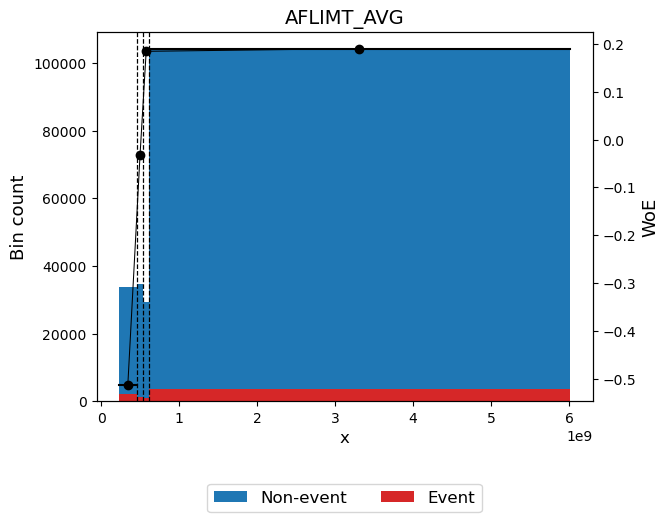


Processing: CBAL_AVG
   -> STATUS: OPTIMAL
   -> IV: 0.0424
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 163635136.00)",31288,0.155175,30525,763,0.024386,0.528262,0.034210,0.004227
1,"[163635136.00, 206325056.00)",20911,0.103710,20111,800,0.038257,0.063629,0.000408,0.000051
2,"[206325056.00, 514979088.00)",109822,0.544671,105056,4766,0.043397,-0.067795,0.002583,0.000323
3,"[514979088.00, inf)",39609,0.196444,37738,1871,0.047237,-0.156587,0.005179,0.000647
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
5,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,201630,1.000000,193430,8200,0.040669,,0.042380,0.005248


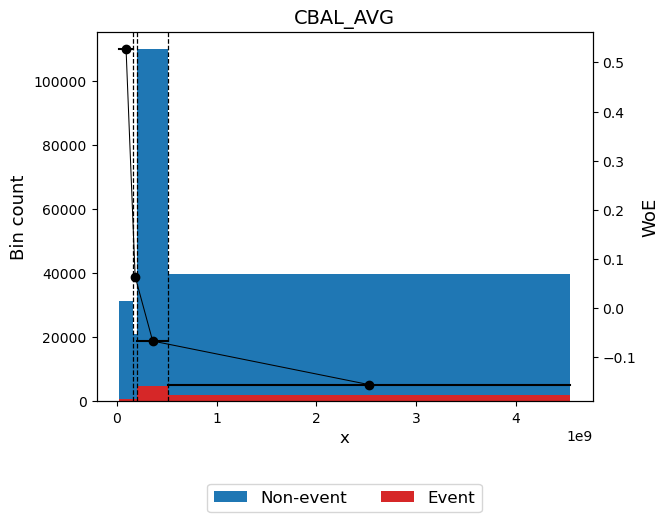


Processing: CBAL_MAX
   -> STATUS: OPTIMAL
   -> IV: 0.0438
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 185851400.00)",27145,0.134628,26516,629,0.023172,0.580591,0.035054,0.004321
1,"[185851400.00, 247590056.00)",24840,0.123196,23913,927,0.037319,0.089442,0.000946,0.000118
2,"[247590056.00, 484301984.00)",82962,0.411457,79360,3602,0.043417,-0.068276,0.001979,0.000247
3,"[484301984.00, 654500960.00)",32172,0.159560,30772,1400,0.043516,-0.070649,0.000823,0.000103
4,"[654500960.00, inf)",34511,0.171160,32869,1642,0.047579,-0.164167,0.004977,0.000621
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,201630,1.000000,193430,8200,0.040669,,0.043779,0.005411


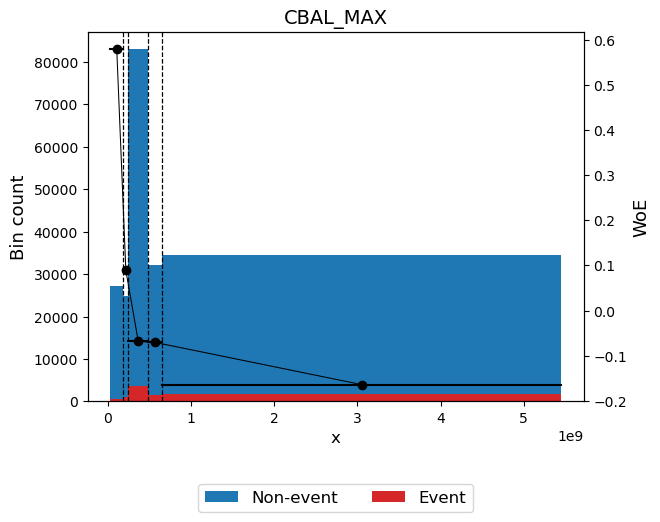


Processing: CBAL_MIN
   -> STATUS: OPTIMAL
   -> IV: 0.0424
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 130908112.00)",31288,0.155175,30525,763,0.024386,0.528262,0.034210,0.004227
1,"[130908112.00, 165060048.00)",20911,0.103710,20111,800,0.038257,0.063629,0.000408,0.000051
2,"[165060048.00, 411983264.00)",109822,0.544671,105056,4766,0.043397,-0.067795,0.002583,0.000323
3,"[411983264.00, inf)",39609,0.196444,37738,1871,0.047237,-0.156587,0.005179,0.000647
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
5,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,201630,1.000000,193430,8200,0.040669,,0.042380,0.005248


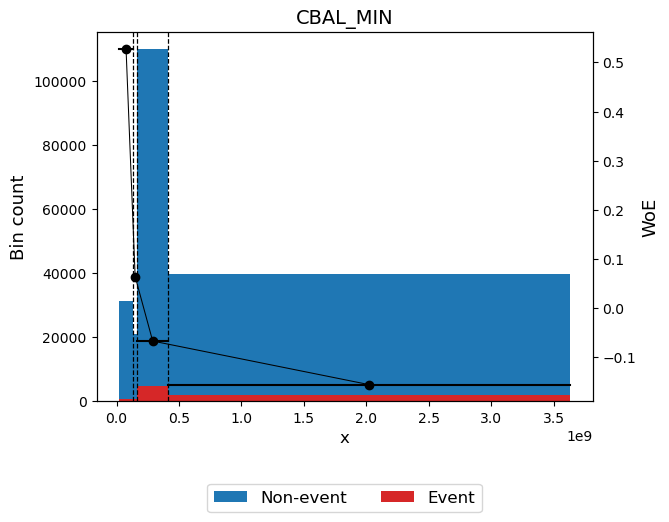


Processing: LTV
   -> STATUS: OPTIMAL
   -> IV: 0.0476
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 7.27)",21825,0.108243,21364,461,0.021123,0.675283,0.036620,0.004492
1,"[7.27, 10.09)",26879,0.133309,25925,954,0.035492,0.141518,0.002503,0.000313
2,"[10.09, 12.54)",24391,0.120969,23369,1022,0.041901,-0.031133,0.000119,0.000015
3,"[12.54, 29.03)",99946,0.495690,95571,4375,0.043774,-0.076819,0.003031,0.000379
4,"[29.03, inf)",28589,0.141789,27201,1388,0.048550,-0.185392,0.005310,0.000663
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,201630,1.000000,193430,8200,0.040669,,0.047582,0.005861


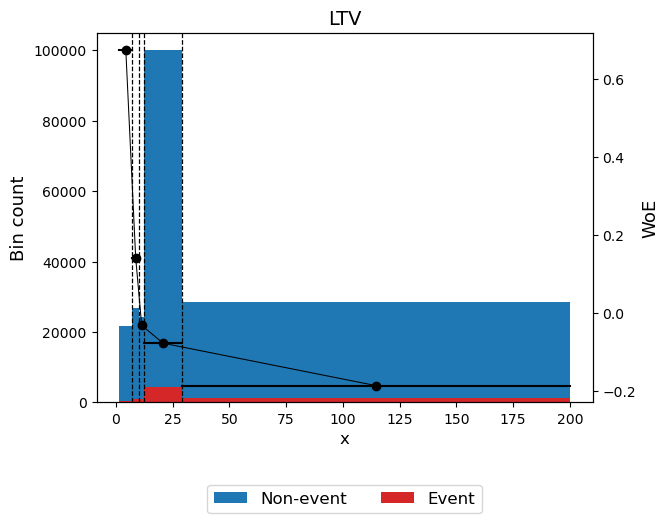


Processing: N_AVG_DEPOSIT_6M
   -> STATUS: OPTIMAL
   -> IV: 0.2188
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 391048.00)",35452,0.175827,32848,2604,0.073451,-0.625939,0.092478,0.011375
1,"[391048.00, 791764.00)",55630,0.275901,52939,2691,0.048373,-0.181554,0.009892,0.001235
2,"[791764.00, 1088177.00)",34832,0.172752,33638,1194,0.034279,0.177566,0.005024,0.000627
3,"[1088177.00, 1571321.50)",45020,0.223280,43888,1132,0.025144,0.496873,0.044145,0.005462
4,"[1571321.50, inf)",30696,0.152239,30117,579,0.018862,0.790761,0.067286,0.008198
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,201630,1.000000,193430,8200,0.040669,,0.218824,0.026897


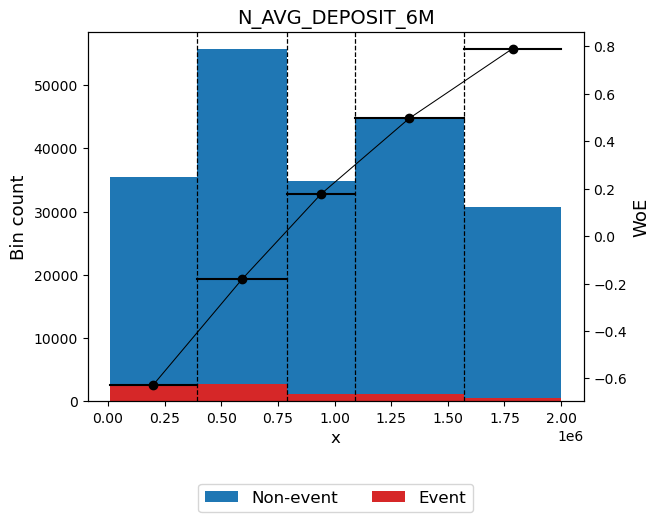


Processing: N_AVG_DD_12M
   -> STATUS: OPTIMAL
   -> IV: 0.2188
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 78209.50)",35452,0.175827,32848,2604,0.073451,-0.625939,0.092478,0.011375
1,"[78209.50, 158352.50)",55630,0.275901,52939,2691,0.048373,-0.181554,0.009892,0.001235
2,"[158352.50, 217635.00)",34832,0.172752,33638,1194,0.034279,0.177566,0.005024,0.000627
3,"[217635.00, 314263.50)",45020,0.223280,43888,1132,0.025144,0.496873,0.044145,0.005462
4,"[314263.50, inf)",30696,0.152239,30117,579,0.018862,0.790761,0.067286,0.008198
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,201630,1.000000,193430,8200,0.040669,,0.218824,0.026897


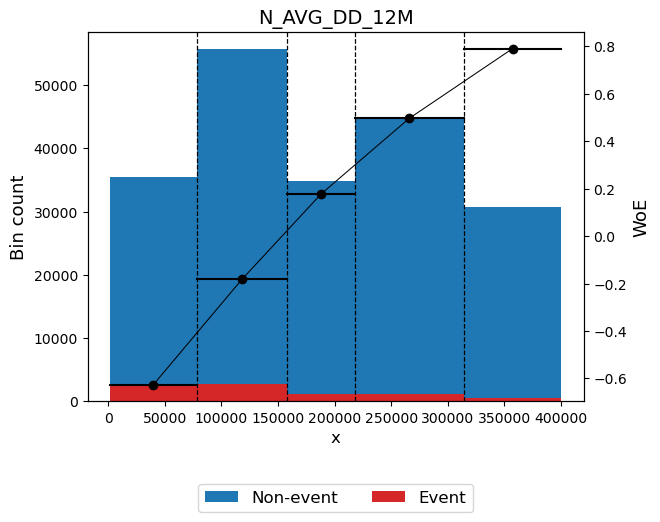


Processing: N_AVG_CD_12M
   -> STATUS: OPTIMAL
   -> IV: 0.2188
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 312838.50)",35452,0.175827,32848,2604,0.073451,-0.625939,0.092478,0.011375
1,"[312838.50, 633411.50)",55630,0.275901,52939,2691,0.048373,-0.181554,0.009892,0.001235
2,"[633411.50, 870542.00)",34832,0.172752,33638,1194,0.034279,0.177566,0.005024,0.000627
3,"[870542.00, 1257058.00)",45020,0.223280,43888,1132,0.025144,0.496873,0.044145,0.005462
4,"[1257058.00, inf)",30696,0.152239,30117,579,0.018862,0.790761,0.067286,0.008198
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,201630,1.000000,193430,8200,0.040669,,0.218824,0.026897


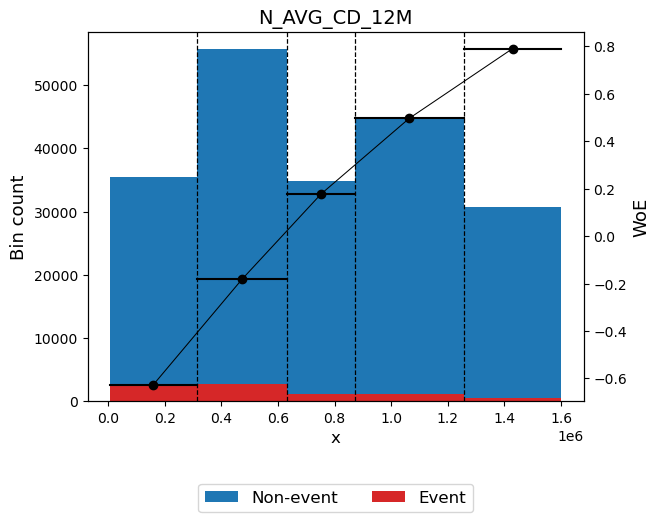


Processing: FLAG_SALARY_ACC
   -> STATUS: OPTIMAL
   -> IV: 0.2373
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.50)",22970,0.113922,20552,2418,0.105268,-1.020764,0.192544,0.023075
1,"[0.50, inf)",178660,0.886078,172878,5782,0.032363,0.237055,0.044715,0.005576
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,201630,1.000000,193430,8200,0.040669,,0.237260,0.028651


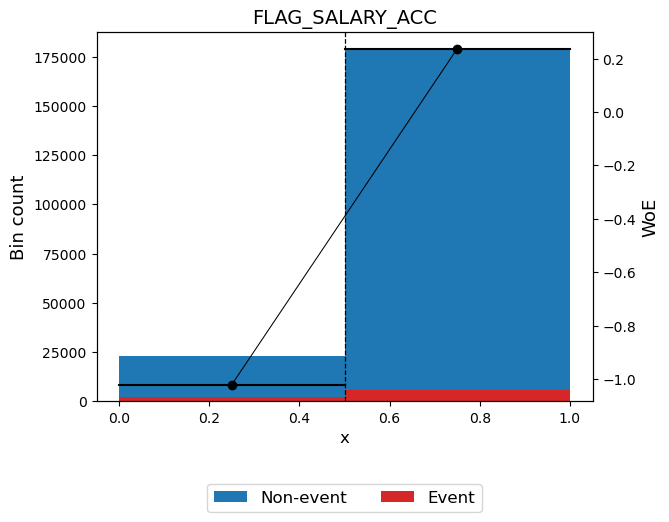


Processing: FLAG_DEPOSIT
   -> STATUS: OPTIMAL
   -> IV: 0.1530
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.50)",116223,0.576417,110053,6170,0.053088,-0.279518,0.051287,0.006390
1,"[0.50, inf)",85407,0.423583,83377,2030,0.023769,0.554555,0.101752,0.012558
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,201630,1.000000,193430,8200,0.040669,,0.153039,0.018949


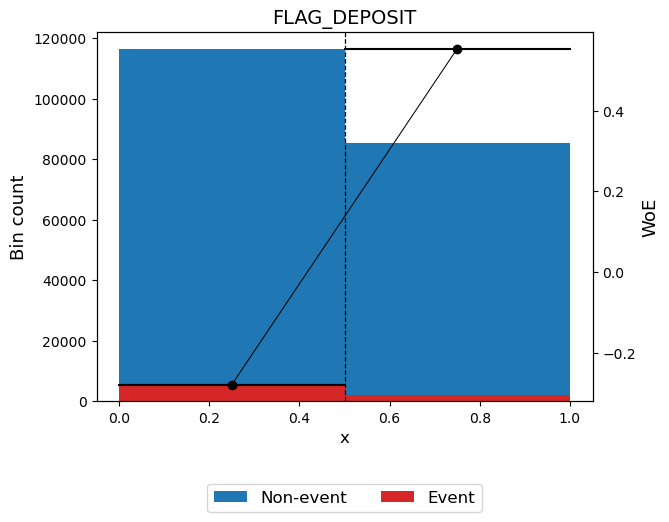


Processing: UTILIZATION_RATE
   -> STATUS: OPTIMAL
   -> IV: 0.1840
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.32)",43489,0.215687,42610,879,0.020212,0.720278,0.081457,9.967595e-03
1,"[0.32, 0.43)",38224,0.189575,37176,1048,0.027417,0.407998,0.026270,3.261220e-03
2,"[0.43, 0.59)",48726,0.241660,46738,1988,0.040800,-0.003353,0.000003,3.401566e-07
3,"[0.59, 0.72)",42184,0.209215,39821,2363,0.056016,-0.336319,0.027680,3.443793e-03
4,"[0.72, inf)",29007,0.143863,27085,1922,0.066260,-0.515168,0.048614,6.010435e-03
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
Totals,,201630,1.000000,193430,8200,0.040669,,0.184024,2.268338e-02


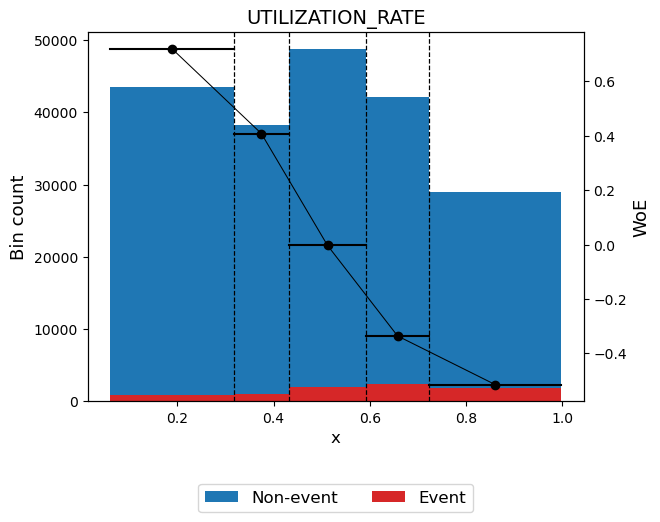


Processing: CNT_CREDIT_CARDS
   -> STATUS: OPTIMAL
   -> IV: 0.0003
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.50)",45068,0.223518,43176,1892,0.041981,-0.033131,0.000249,0.000031
1,"[0.50, inf)",156562,0.776482,150254,6308,0.040291,0.009727,0.000073,0.000009
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,201630,1.000000,193430,8200,0.040669,,0.000322,0.000040


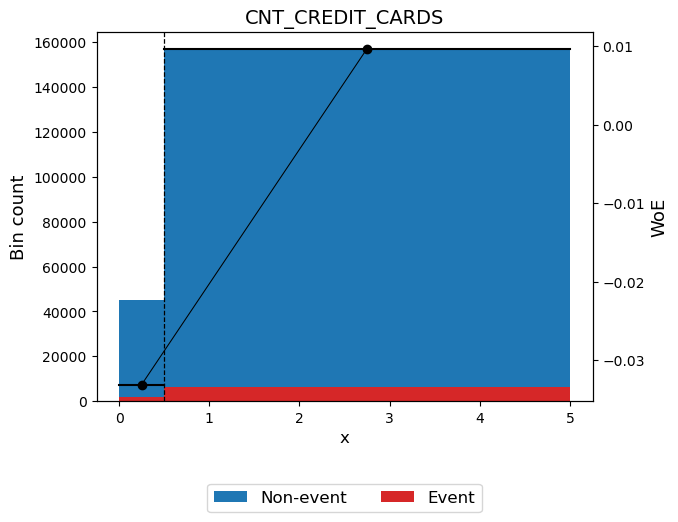


Processing: AMT_CASH_ADVANCE_12M
   -> STATUS: OPTIMAL
   -> IV: 0.0199
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 32986952.00)",168190,0.834152,161785,6405,0.038082,0.068408,0.003783,0.000473
1,"[32986952.00, inf)",33440,0.165848,31645,1795,0.053678,-0.291206,0.016105,0.002006
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,201630,1.000000,193430,8200,0.040669,,0.019888,0.002479


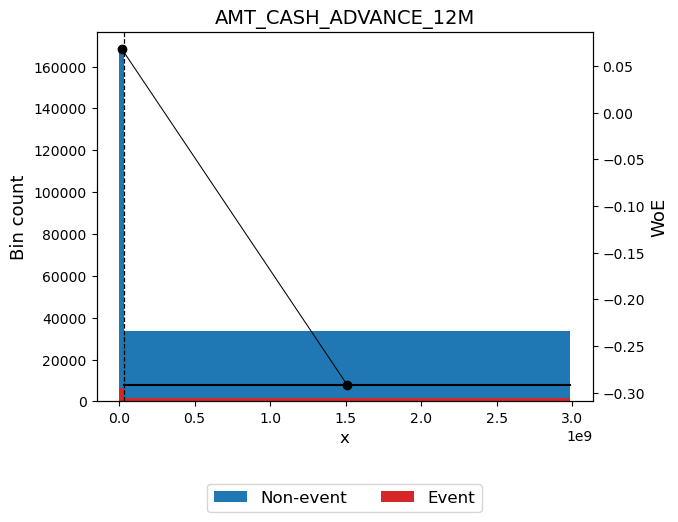


Processing: FLAG_CASH_ADVANCE
   -> STATUS: OPTIMAL
   -> IV: 0.0199
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.50)",168189,0.834147,161784,6405,0.038082,0.068402,0.003782,0.000473
1,"[0.50, inf)",33441,0.165853,31646,1795,0.053677,-0.291175,0.016101,0.002006
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,201630,1.000000,193430,8200,0.040669,,0.019884,0.002478


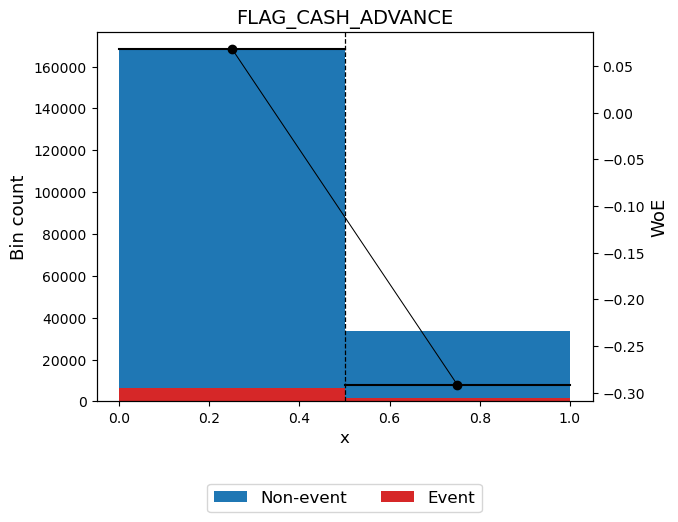


Processing: PCT_PAYMENT_TO_BALANCE
   -> STATUS: OPTIMAL
   -> IV: 0.0398
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.78)",40564,0.201180,38484,2080,0.051277,-0.242907,0.013288,0.001657
1,"[0.78, 0.90)",22116,0.109686,21079,1037,0.046889,-0.148836,0.002603,0.000325
2,"[0.90, 1.22)",71648,0.355344,68682,2966,0.041397,-0.018509,0.000123,0.000015
3,"[1.22, 1.49)",45407,0.225200,43887,1520,0.033475,0.202126,0.008393,0.001047
4,"[1.49, inf)",21895,0.108590,21298,597,0.027266,0.41367,0.015431,0.001915
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,201630,1.000000,193430,8200,0.040669,,0.039837,0.004960


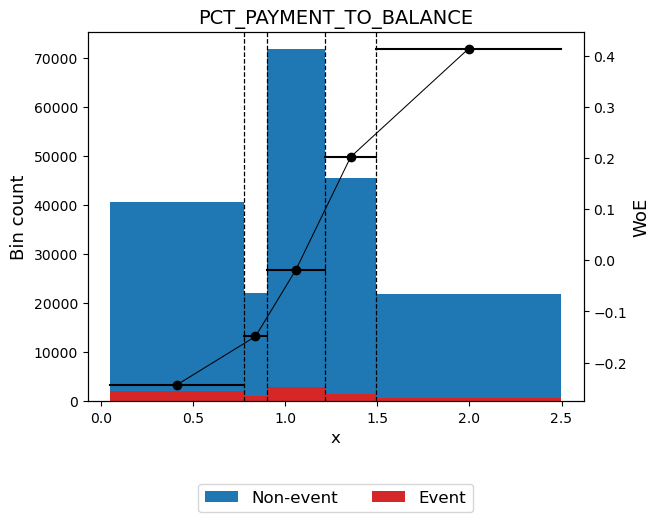


Processing: CNT_MIN_PAY_6M
   -> STATUS: OPTIMAL
   -> IV: 0.0803
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.50)",129616,0.642841,125419,4197,0.032380,0.236509,0.032299,0.004028
1,"[0.50, 1.50)",28087,0.139300,26686,1401,0.049881,-0.213829,0.007033,0.000877
2,"[1.50, inf)",43927,0.217859,41325,2602,0.059235,-0.395594,0.041013,0.005093
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,201630,1.000000,193430,8200,0.040669,,0.080345,0.009999


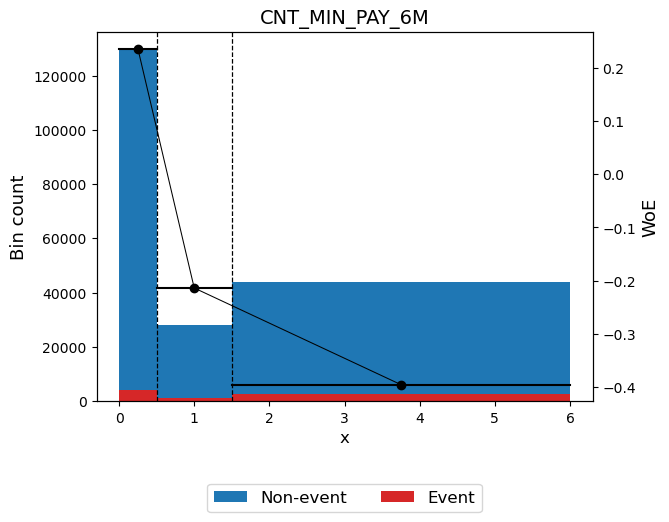


Processing: AVG_DAYS_PAST_DUE
   -> STATUS: OPTIMAL
   -> IV: 0.0798
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.50)",131328,0.651332,127053,4275,0.032552,0.231039,0.031306,0.003905
1,"[0.50, 5.50)",48501,0.240545,45951,2550,0.052576,-0.269299,0.019771,0.002464
2,"[5.50, inf)",21801,0.108124,20426,1375,0.063071,-0.462427,0.028709,0.003557
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,201630,1.000000,193430,8200,0.040669,,0.079786,0.009926


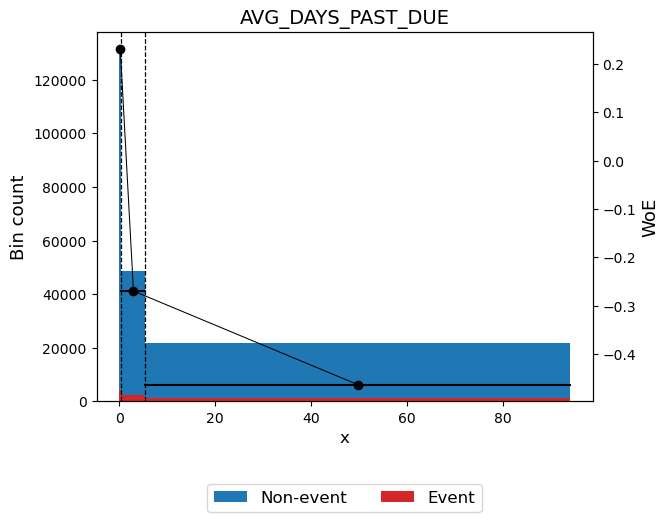


Processing: DTI_RATIO
   -> STATUS: OPTIMAL
   -> IV: 0.2221
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 1.00)",70761,0.350945,69264,1497,0.021156,0.673681,0.118246,0.014507
1,"[1.00, 1.21)",27611,0.136939,26621,990,0.035855,0.130969,0.002213,0.000276
2,"[1.21, 1.63)",46690,0.231563,44641,2049,0.043885,-0.079481,0.001517,0.000190
3,"[1.63, 2.09)",31636,0.156901,29936,1700,0.053736,-0.292348,0.015364,0.001914
4,"[2.09, inf)",24932,0.123652,22968,1964,0.078774,-0.701663,0.084741,0.010381
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,201630,1.000000,193430,8200,0.040669,,0.222081,0.027268


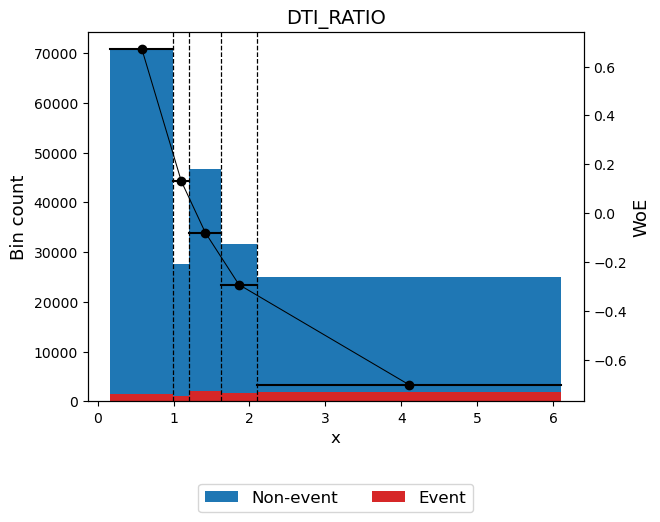


Processing: PTI_RATIO
   -> STATUS: OPTIMAL
   -> IV: 0.1975
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.43)",28533,0.141512,28023,510,0.017874,0.845589,0.069912,0.008488
1,"[0.43, 0.59)",30598,0.151753,29950,648,0.021178,0.672612,0.050992,0.006257
2,"[0.59, 0.76)",32068,0.159044,30948,1120,0.034926,0.158198,0.003703,0.000462
3,"[0.76, 1.22)",59483,0.295011,56792,2691,0.045240,-0.111299,0.003847,0.000481
4,"[1.22, inf)",50948,0.252681,47717,3231,0.063418,-0.468285,0.068995,0.008546
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,201630,1.000000,193430,8200,0.040669,,0.197450,0.024234


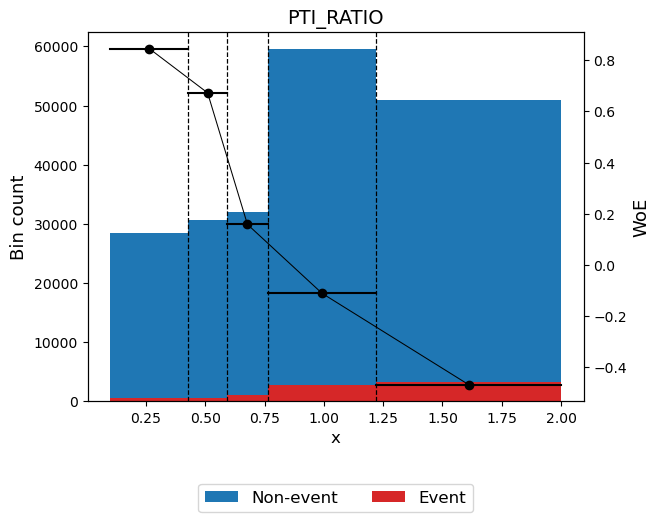


Processing: MOB
   -> STATUS: OPTIMAL
   -> IV: 0.0002
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 69.50)",113313,0.561985,108646,4667,0.041187,-0.013203,0.000099,0.000012
1,"[69.50, inf)",88317,0.438015,84784,3533,0.040004,0.017178,0.000128,0.000016
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,201630,1.000000,193430,8200,0.040669,,0.000227,0.000028


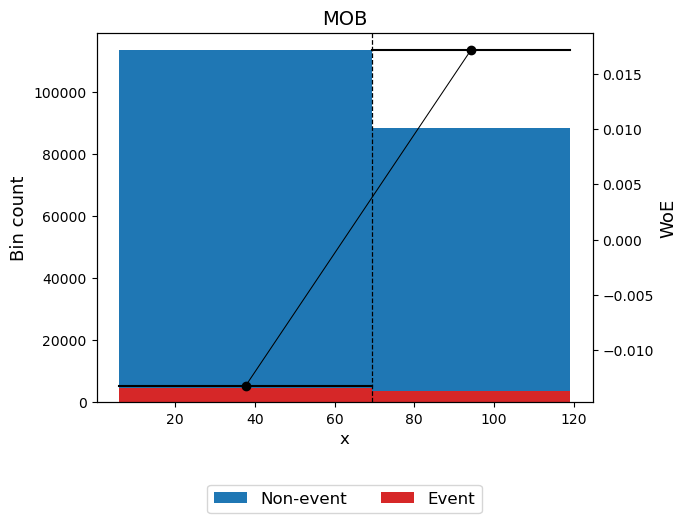


Processing: CNT_OTHER_PRODUCTS
   -> STATUS: OPTIMAL
   -> IV: 0.0001
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 1.50)",171450,0.85032,164503,6947,0.040519,0.003837,0.000012,0.000002
1,"[1.50, inf)",30180,0.14968,28927,1253,0.041518,-0.021547,0.000070,0.000009
2,Special,0,0.00000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.00000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,201630,1.00000,193430,8200,0.040669,,0.000083,0.000010


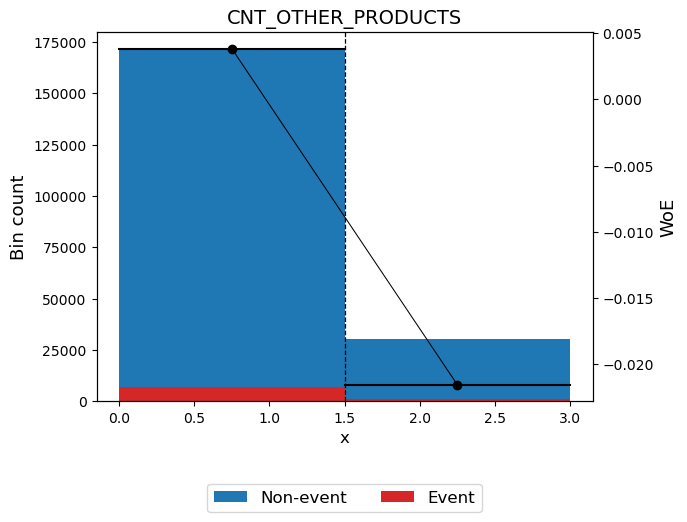


Processing: LIMIT_TO_INCOME
   -> STATUS: OPTIMAL
   -> IV: 0.0793
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 25.72)",23786,0.117969,23010,776,0.032624,0.22875,0.005564,0.000694
1,"[25.72, 28.96)",47148,0.233834,45521,1627,0.034508,0.170654,0.006301,0.000787
2,"[28.96, 31.58)",39576,0.196280,38112,1464,0.036992,0.098575,0.001823,0.000228
3,"[31.58, 36.47)",70126,0.347795,67404,2722,0.038816,0.048556,0.000802,0.000100
4,"[36.47, inf)",20994,0.104121,19383,1611,0.076736,-0.67324,0.064804,0.007951
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,201630,1.000000,193430,8200,0.040669,,0.079294,0.009760


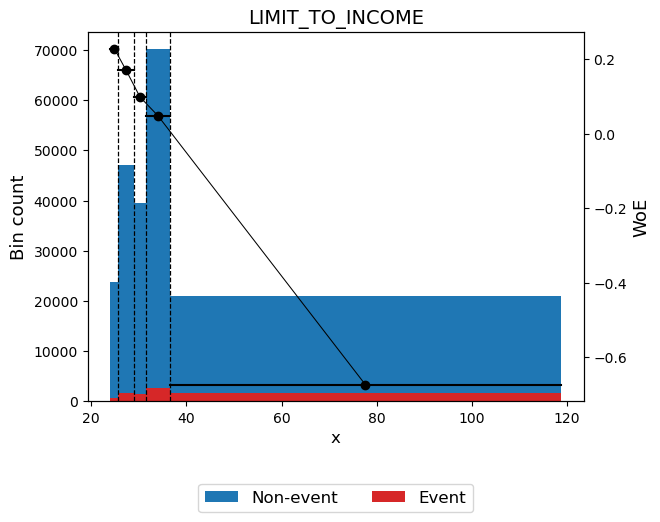


Processing: AMT_VAR_6M
   -> STATUS: OPTIMAL
   -> IV: 0.0004
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, -0.04)",86241,0.427719,82810,3431,0.039784,0.022916,0.000222,2.778130e-05
1,"[-0.04, 0.04)",31690,0.157169,30396,1294,0.040833,-0.004209,0.000003,3.486701e-07
2,"[0.04, inf)",83699,0.415112,80224,3475,0.041518,-0.021553,0.000195,2.434434e-05
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
Totals,,201630,1.000000,193430,8200,0.040669,,0.000420,5.247431e-05


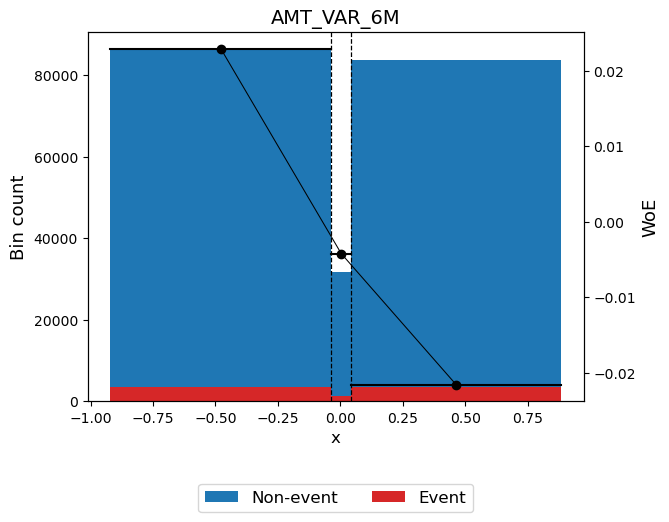


Processing: CBAL_SHORTTERM_LOAN
   -> STATUS: OPTIMAL
   -> IV: 0.0086
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 48559692.00)",37625,0.186604,36297,1328,0.035296,0.14728,0.003785,0.000473
1,"[48559692.00, 97929768.00)",37304,0.185012,35884,1420,0.038066,0.068853,0.000850,0.000106
2,"[97929768.00, 156535280.00)",36785,0.182438,35313,1472,0.040016,0.016848,0.000051,0.000006
3,"[156535280.00, 385707936.00)",68146,0.337975,65171,2975,0.043656,-0.074011,0.001916,0.000239
4,"[385707936.00, inf)",21770,0.107970,20765,1005,0.046164,-0.1325,0.002015,0.000252
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,201630,1.000000,193430,8200,0.040669,,0.008617,0.001076


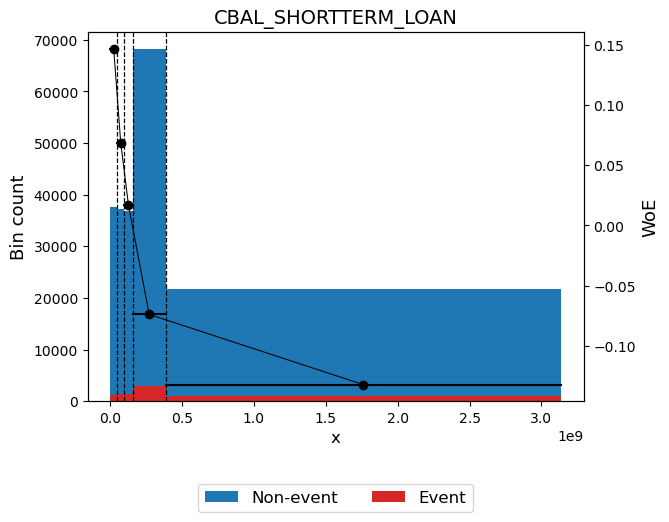


Processing: CBAL_LONGTERM_LOAN
   -> STATUS: OPTIMAL
   -> IV: 0.0099
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 50536192.00)",39508,0.195943,38093,1415,0.035816,0.132119,3.220190e-03,4.022312e-04
1,"[50536192.00, 127406020.00)",55422,0.274870,53317,2105,0.037981,0.071158,1.347200e-03,1.683644e-04
2,"[127406020.00, 178786400.00)",28782,0.142747,27611,1171,0.040685,-0.000425,2.583432e-08,3.229290e-09
3,"[178786400.00, 254561568.00)",29428,0.145951,28169,1259,0.042782,-0.052877,4.181358e-04,5.226089e-05
4,"[254561568.00, inf)",48490,0.240490,46240,2250,0.046401,-0.137867,4.871839e-03,6.084980e-04
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000e+00,0.000000e+00
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000e+00,0.000000e+00
Totals,,201630,1.000000,193430,8200,0.040669,,9.857389e-03,1.231358e-03


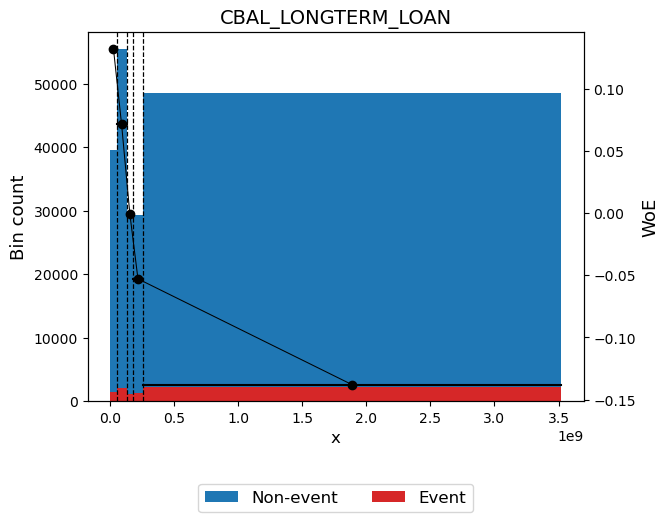


Processing: CNT_DPD_30PLUS_6M
   -> STATUS: OPTIMAL
   -> IV: 0.0323
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.50)",169214,0.83923,162888,6326,0.037385,0.087613,0.006189,0.000773
1,"[0.50, inf)",32416,0.16077,30542,1874,0.057811,-0.369754,0.026119,0.003246
2,Special,0,0.00000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.00000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,201630,1.00000,193430,8200,0.040669,,0.032308,0.004020


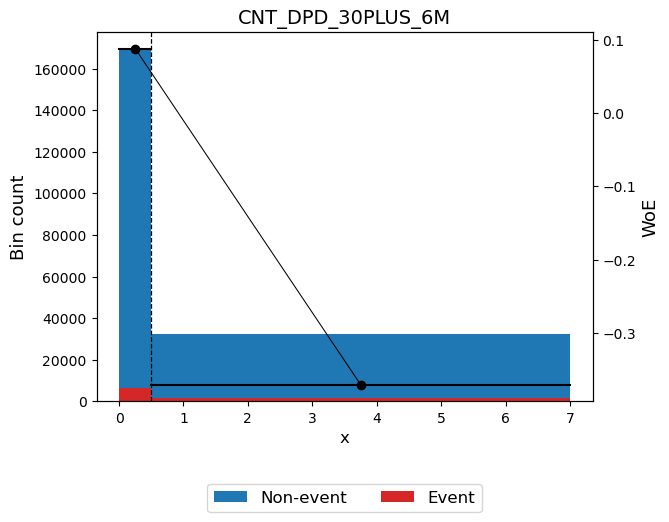


Processing: OCCUPATION_TYPE
   -> STATUS: OPTIMAL
   -> IV: 0.0005
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[4],20364,0.100997,19575,789,0.038745,0.050461,0.000251,0.000031
1,[2],60769,0.301389,58341,2428,0.039955,0.018456,0.000102,0.000013
2,[3],40271,0.199727,38615,1656,0.041121,-0.011546,0.000027,0.000003
3,[1],80226,0.397887,76899,3327,0.041470,-0.02036,0.000166,0.000021
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
5,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,201630,1.000000,193430,8200,0.040669,,0.000546,0.000068


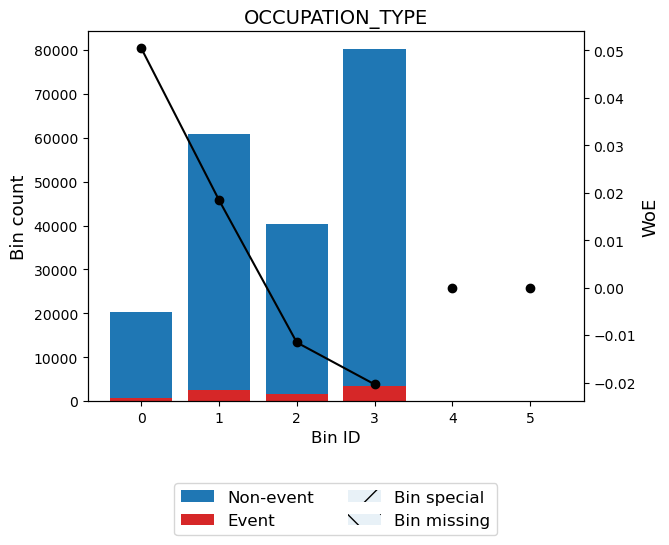


Processing: DURATION_MAX
   -> STATUS: OPTIMAL
   -> IV: 0.0001
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 48.00)",66145,0.328051,63428,2717,0.041076,-0.010404,0.000036,0.000004
1,"[48.00, inf)",135485,0.671949,130002,5483,0.040469,0.005116,0.000018,0.000002
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,201630,1.000000,193430,8200,0.040669,,0.000053,0.000007


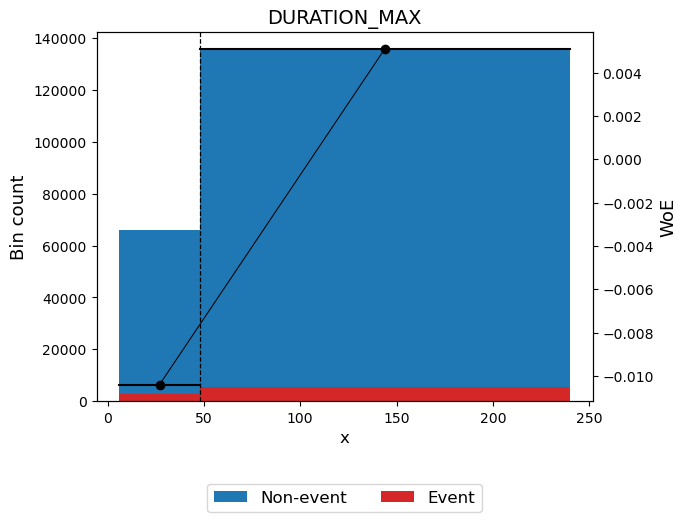


Processing: REMAINING_DURATION_MAX
   -> STATUS: OPTIMAL
   -> IV: 0.0000
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 43.50)",126939,0.629564,121761,5178,0.040791,-0.00314,0.000006,7.771795e-07
1,"[43.50, inf)",74691,0.370436,71669,3022,0.040460,0.005358,0.000011,1.325998e-06
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
Totals,,201630,1.000000,193430,8200,0.040669,,0.000017,2.103178e-06


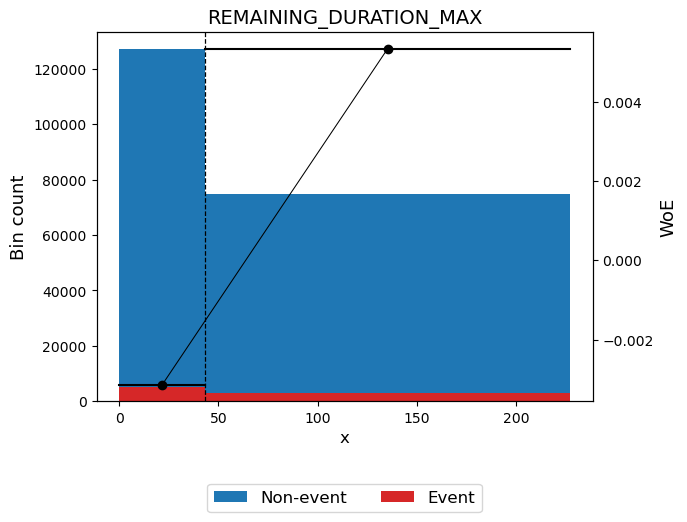


Processing: TIME_TO_OP_MAX
   -> STATUS: OPTIMAL
   -> IV: 0.0003
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 14.50)",46620,0.231216,44674,1946,0.041742,-0.027166,0.000173,0.000022
1,"[14.50, 25.50)",40728,0.201994,39054,1674,0.041102,-0.011052,0.000025,0.000003
2,"[25.50, inf)",114282,0.566791,109702,4580,0.040076,0.015287,0.000132,0.000016
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,201630,1.000000,193430,8200,0.040669,,0.000329,0.000041


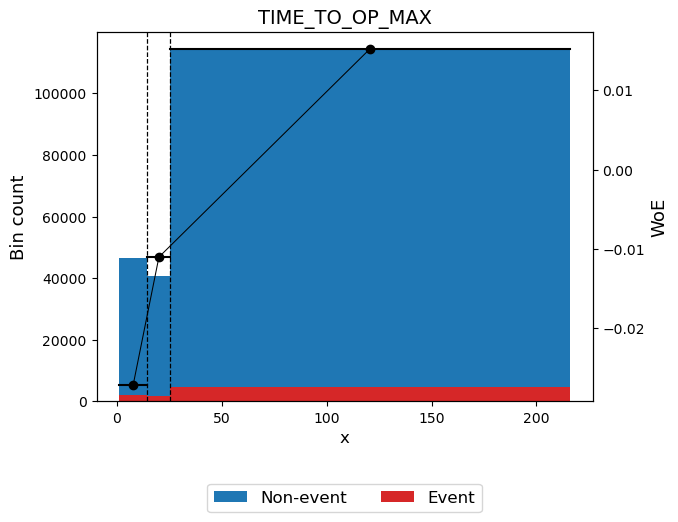


Processing: RATE_AVG
   -> STATUS: OPTIMAL
   -> IV: 0.0786
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 6.73)",25759,0.127754,25151,608,0.023603,0.561697,0.031388,0.003873
1,"[6.73, 7.66)",22500,0.111591,21845,655,0.029111,0.346311,0.011448,0.001424
2,"[7.66, 8.73)",34058,0.168913,32861,1197,0.035146,0.151687,0.003627,0.000453
3,"[8.73, 10.55)",61213,0.303591,58646,2567,0.041936,-0.032,0.000315,0.000039
4,"[10.55, inf)",58100,0.288152,54927,3173,0.054613,-0.309454,0.031870,0.003968
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,201630,1.000000,193430,8200,0.040669,,0.078648,0.009757


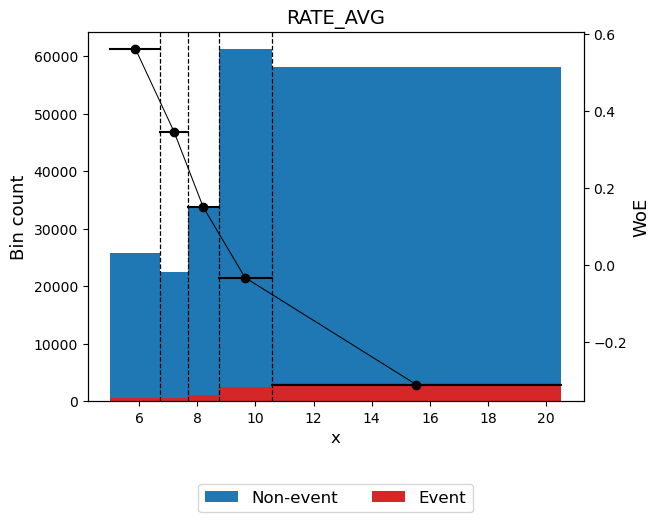


Processing: PURCOD_MAX
   -> STATUS: OPTIMAL
   -> IV: 0.0006
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[9, 6]",120489,0.597575,115677,4812,0.039937,0.018907,0.000212,2.647252e-05
1,[3],20383,0.101091,19550,833,0.040867,-0.005085,0.000003,3.274559e-07
2,"[2, 1]",60758,0.301334,58203,2555,0.042052,-0.034897,0.000373,4.661031e-05
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
Totals,,201630,1.000000,193430,8200,0.040669,,0.000587,7.341029e-05


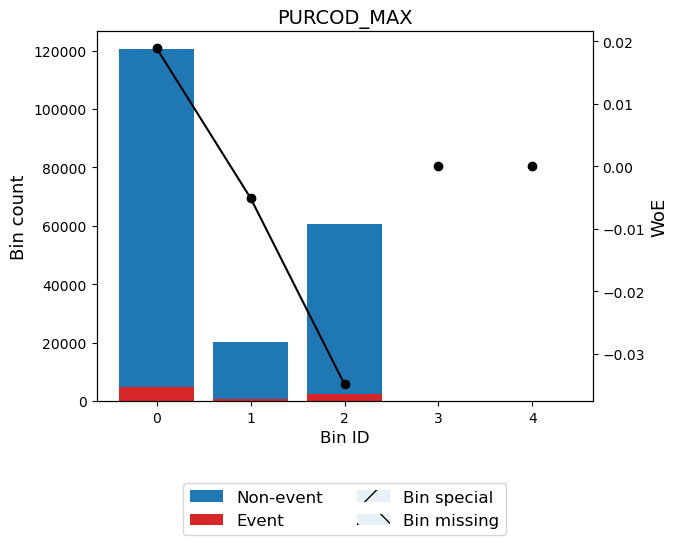


Processing: PURCOD_MIN
   -> STATUS: OPTIMAL
   -> IV: 0.0006
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[9, 6]",120489,0.597575,115677,4812,0.039937,0.018907,0.000212,2.647252e-05
1,[3],20383,0.101091,19550,833,0.040867,-0.005085,0.000003,3.274559e-07
2,"[2, 1]",60758,0.301334,58203,2555,0.042052,-0.034897,0.000373,4.661031e-05
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
Totals,,201630,1.000000,193430,8200,0.040669,,0.000587,7.341029e-05


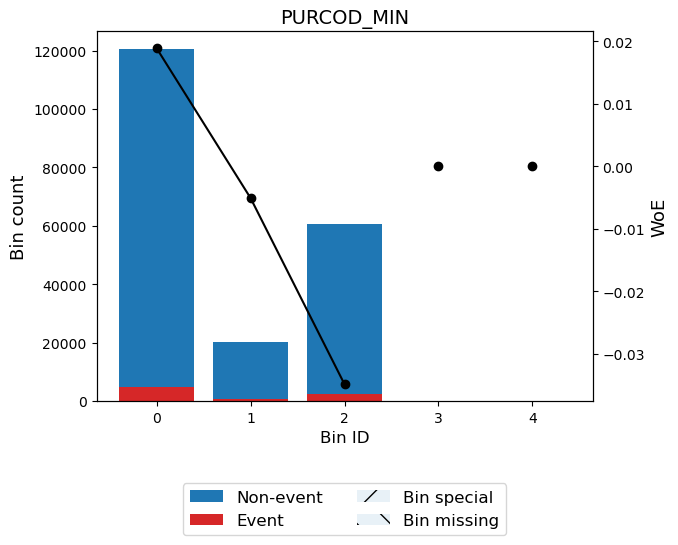


Processing: MAX_DPD_12M
   -> STATUS: OPTIMAL
   -> IV: 1.0647
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 3.50)",47679,0.236468,47484,195,0.004090,2.334367,0.517538,0.053115
1,"[3.50, 9.50)",40601,0.201364,40231,370,0.009113,1.528109,0.248876,0.028397
2,"[9.50, 19.50)",37842,0.187680,36246,1596,0.042175,-0.037953,0.000275,0.000034
3,"[19.50, 48.50)",47999,0.238055,44764,3235,0.067397,-0.533406,0.086993,0.010747
4,"[48.50, inf)",27509,0.136433,24705,2804,0.101930,-0.984823,0.210979,0.025356
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,201630,1.000000,193430,8200,0.040669,,1.064661,0.117650


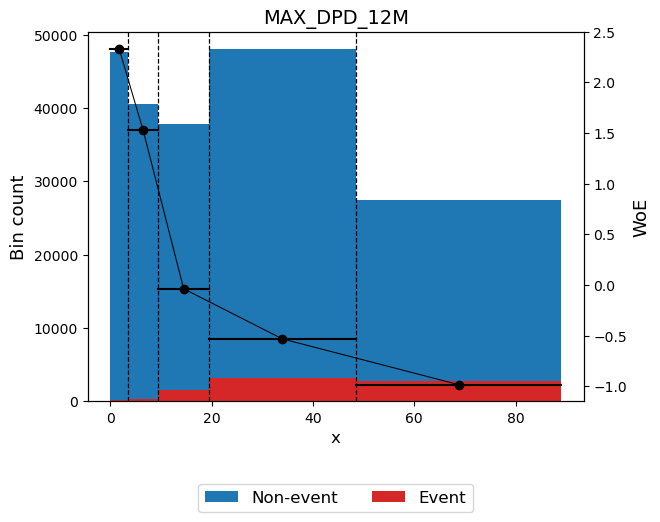


Processing: MAX_DPD_12M_OBS
   -> STATUS: OPTIMAL
   -> IV: 1.0647
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 3.50)",47679,0.236468,47484,195,0.004090,2.334367,0.517538,0.053115
1,"[3.50, 9.50)",40601,0.201364,40231,370,0.009113,1.528109,0.248876,0.028397
2,"[9.50, 19.50)",37842,0.187680,36246,1596,0.042175,-0.037953,0.000275,0.000034
3,"[19.50, 48.50)",47999,0.238055,44764,3235,0.067397,-0.533406,0.086993,0.010747
4,"[48.50, inf)",27509,0.136433,24705,2804,0.101930,-0.984823,0.210979,0.025356
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,201630,1.000000,193430,8200,0.040669,,1.064661,0.117650


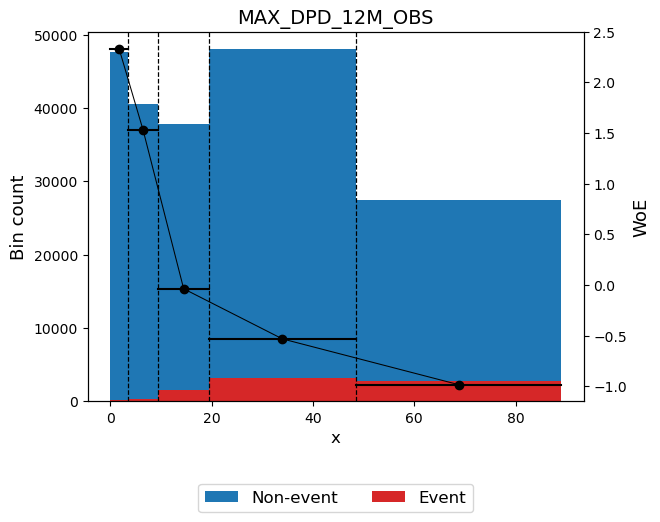


Processing: SUM_ALL_OD_12M
   -> STATUS: OPTIMAL
   -> IV: 0.9764
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 2.50)",29748,0.147538,29653,95,0.003193,2.58266,0.366003,0.036178
1,"[2.50, 8.50)",29321,0.145420,29138,183,0.006241,1.909531,0.245034,0.026687
2,"[8.50, 20.50)",36905,0.183033,36273,632,0.017125,0.889158,0.098209,0.011887
3,"[20.50, 56.50)",52713,0.261434,50016,2697,0.051164,-0.240579,0.016919,0.002110
4,"[56.50, inf)",52943,0.262575,48350,4593,0.086754,-0.806849,0.250253,0.030460
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,201630,1.000000,193430,8200,0.040669,,0.976418,0.107322


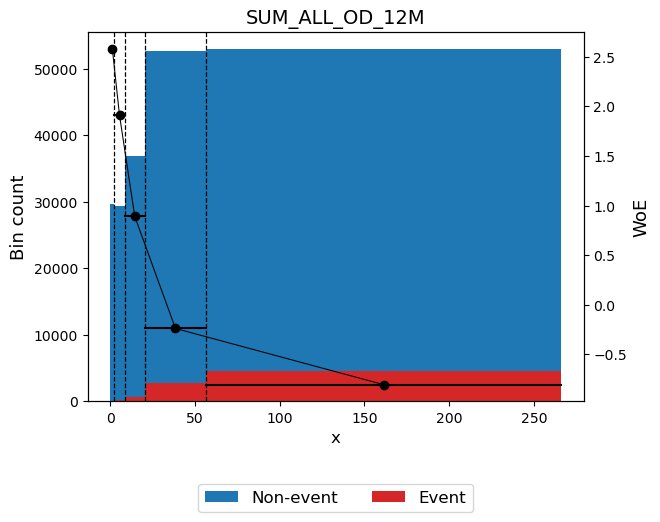


Processing: N_AVG_OVERDUE_CBAL_12M
   -> STATUS: OPTIMAL
   -> IV: 0.1409
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 72753056.00)",34409,0.170654,33906,503,0.014618,1.049976,0.119641,0.014304
1,"[72753056.00, 101043796.00)",24792,0.122958,23844,948,0.038238,0.064152,0.000491,0.000061
2,"[101043796.00, 125364900.00)",22282,0.110509,21278,1004,0.045059,-0.1071,0.001332,0.000166
3,"[125364900.00, 293162096.00)",93742,0.464921,89348,4394,0.046873,-0.148483,0.010979,0.001371
4,"[293162096.00, inf)",26405,0.130958,25054,1351,0.051165,-0.240593,0.008476,0.001057
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,201630,1.000000,193430,8200,0.040669,,0.140920,0.016960


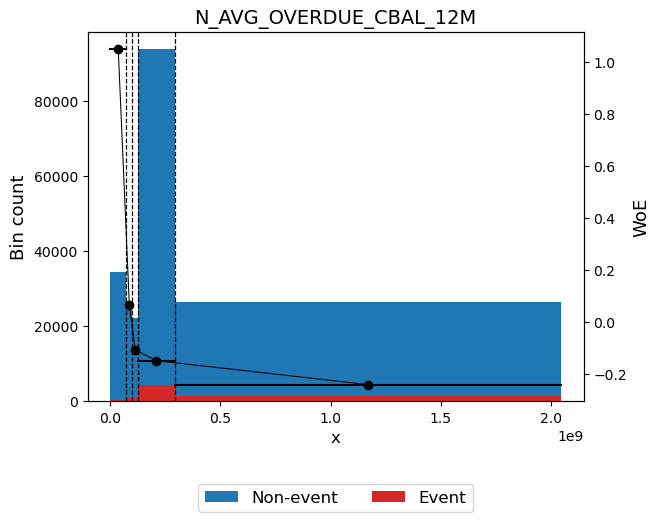


Processing: CBAL_TO_INC_12MON
   -> STATUS: OPTIMAL
   -> IV: 0.2221
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 11.95)",70761,0.350945,69264,1497,0.021156,0.673681,0.118246,0.014507
1,"[11.95, 14.49)",27611,0.136939,26621,990,0.035855,0.130969,0.002213,0.000276
2,"[14.49, 19.54)",46690,0.231563,44641,2049,0.043885,-0.079481,0.001517,0.000190
3,"[19.54, 25.11)",31636,0.156901,29936,1700,0.053736,-0.292348,0.015364,0.001914
4,"[25.11, inf)",24932,0.123652,22968,1964,0.078774,-0.701663,0.084741,0.010381
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,201630,1.000000,193430,8200,0.040669,,0.222081,0.027268


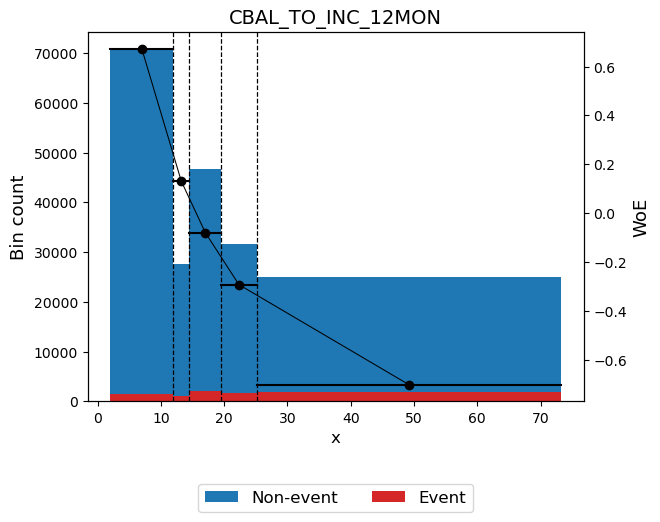


Processing: REAL_GDP_GROWTH_12M
   -> STATUS: OPTIMAL
   -> IV: 0.0039
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 2.75)",50067,0.248311,47900,2167,0.043282,-0.06501,0.001081,0.000135
1,"[2.75, 4.97)",51336,0.254605,49135,2201,0.042874,-0.055122,0.000793,0.000099
2,"[4.97, 7.05)",49330,0.244656,47429,1901,0.038536,0.056072,0.000750,0.000094
3,"[7.05, inf)",50897,0.252428,48966,1931,0.037939,0.072307,0.001277,0.000160
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
5,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,201630,1.000000,193430,8200,0.040669,,0.003901,0.000488


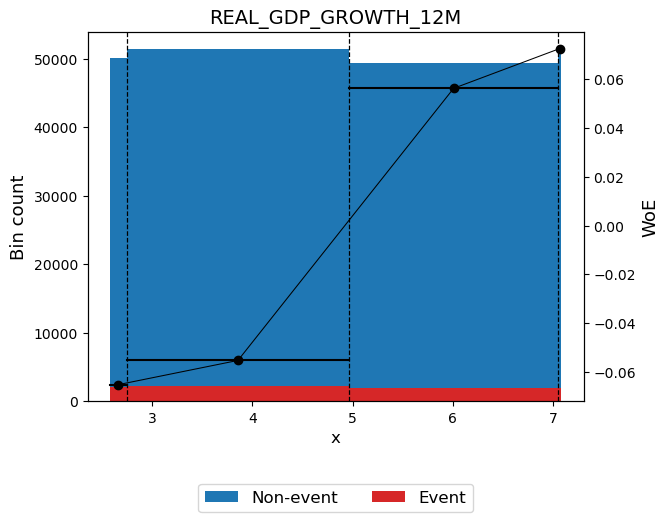

In [56]:
forced_cat_cols = [
    "C_GIOITINH", "TTHONNHAN", "PURCOD_MAX", "PURCOD_MIN",
    "OCCUPATION_TYPE", "TRINHDO", "MAX_NHOMNOCIC"
]

exclude_cols = [
    "SEGMENT", "SAMPLE_TYPE", "SOCIF", "year",
    "bad_current", "CASE_ID", target_col,
    "SNAPSHOT_DATE", "CURE_DATE", 'COLLATERAL_VALUE', 'N_AVG_DEPOSIT_12M'
]


candidates = [c for c in train.columns if c not in exclude_cols]

# --- BƯỚC LỌC THÔ (PRE-FILTER) ---
clean_candidates = []
for c in candidates:
    # 1. Loại biến chỉ có 1 giá trị duy nhất (Constant)
    if train[c].nunique() <= 1:
        print(f"Skip {c}: Biến hằng số (1 unique value)")
        continue
        
    # 2. Loại biến 100% Missing
    if train[c].isnull().all():
        print(f"Skip {c}: Biến 100% Null")
        continue
        
    clean_candidates.append(c)

# Cập nhật lại list cần chạy
candidates = clean_candidates

binning_results = {}

for feature in candidates:
    print(f"\nProcessing: {feature}")

    try:
        # Xác định loại biến
        is_categorical = feature in forced_cat_cols or \
                         (not pd.api.types.is_numeric_dtype(train[feature]))

        x_clean = train[feature].values 
        dtype_input = "numerical"
        
        if is_categorical:
            dtype_input = "categorical"
            x_clean = train[feature].astype(str).values

        optb = OptimalBinning(
            name=feature,
            dtype=dtype_input,
            solver="mip",
            monotonic_trend='auto_asc_desc',
            max_n_bins=5,
            prebinning_method='cart',
            divergence='iv',
            min_n_bins=2,
            min_bin_size=0.1
        )

        optb.fit(x_clean, train[target_col])

        print(f"   -> STATUS: {optb.status}")

        if optb.status in ["OPTIMAL", "FEASIBLE"]:
            optb.binning_table.build()
            # Lưu lại kết quả
            binning_results[feature] = optb
 
            # IV
            print(f"   -> IV: {optb.binning_table.iv:.4f}")

            # Hiển thị bảng
            print("   -> Chi tiết các Bin:")
            display(optb.binning_table.build())

            # Vẽ WOE
            try:
                # 1. Xóa plot cũ
                plt.close('all')
                
                # 2. Xử lý tiêu đề cho gọn
                plot_title = f"Var: {feature} | IV: {optb.binning_table.iv:.4f}"
                
                # 3. Vẽ hình dựa trên loại biến
                if dtype_input == "numerical":
                    # Biến số: Vẽ style="actual" để thấy xu hướng tăng/giảm rõ ràng
                    optb.binning_table.plot(metric="woe", style="actual", add_special=True)
                else:
                    # Biến category: KHÔNG dùng style="actual", chỉ vẽ cột mặc định
                    optb.binning_table.plot(metric="woe", add_special=True)
                
                # 4. Hiển thị
                plt.show()
                plt.close() # Đóng ngay

            except Exception as e_plot:
                print(f"   -> Lỗi vẽ hình: {e_plot}")

        else:
            print("   -> Skip: Không tạo được bin tối ưu")

    except Exception as e:
        print(f"   -> ERROR: {e}")

TỔNG HỢP KẾT QUẢ VÀ KIỂM TRA CHẤT LƯỢNG BIẾN

In [57]:
summary_data = []

for feature, optb in binning_results.items():
    # 1. Lấy bảng binning chi tiết
    bt = optb.binning_table.build()
    
    # --- SỬA LỖI TẠI ĐÂY ---
    # Chuyển cột Bin sang string trước khi so sánh để tránh lỗi với biến Category (list)
    bt_clean = bt[bt['Bin'].astype(str) != 'Totals']
    
    # Chỉ xét các bin có dữ liệu (Count > 0)
    valid_bins = bt_clean[bt_clean['Count'] > 0]
    
    if valid_bins.empty:
        continue

    # 2. Tính toán các chỉ số
    iv_value = optb.binning_table.iv
    min_bin_pct = valid_bins['Count (%)'].min() # Tỷ lệ % của bin nhỏ nhất
    max_bin_pct = valid_bins['Count (%)'].max() # Tỷ lệ % của bin lớn nhất
    n_bins = len(valid_bins)

    # 3. Xác định xu hướng (Trend) với PD (Event Rate)
    trend_observed = "N/A (Categorical)"
    
    if optb.dtype == "numerical":
        # Lấy các bin số thực (loại bỏ Special/Missing)
        # Convert sang str để so sánh an toàn
        mask_special = valid_bins['Bin'].astype(str).isin(['Special', 'Missing'])
        numeric_bins = valid_bins[~mask_special]
        
        if len(numeric_bins) >= 2:
            first_er = numeric_bins.iloc[0]['Event rate']
            last_er = numeric_bins.iloc[-1]['Event rate']
            
            if last_er > first_er:
                trend_observed = "Tăng (Thuận)"
            elif last_er < first_er:
                trend_observed = "Giảm (Nghịch)"
            else:
                trend_observed = "Không rõ (Flat)"

    # 4. Gắn cờ cảnh báo (Flag Issues)
    issues = []
    if iv_value < 0.02: 
        issues.append("Weak IV")
    if min_bin_pct < 0.05: 
        issues.append("Small Bin (<5%)")
    if optb.status != "OPTIMAL":
        issues.append(f"Status: {optb.status}")
    if n_bins < 2:
        issues.append("Single Bin")

    # 5. Đưa vào danh sách tổng hợp
    summary_data.append({
        "Variable": feature,
        "IV": iv_value,
        "Trend_PD": trend_observed,
        "Min_Bin_Pct": min_bin_pct,
        "Max_Bin_Pct": max_bin_pct,
        "Num_Bins": n_bins,
        "Quality_Check": ", ".join(issues) if issues else "PASS"
    })

# --- HIỂN THỊ KẾT QUẢ ---
if summary_data:
    df_summary = pd.DataFrame(summary_data)
    
    # Sắp xếp theo IV giảm dần
    df_summary = df_summary.sort_values("IV", ascending=False).reset_index(drop=True)
    
    # Hiển thị full danh sách
    pd.set_option('display.max_rows', None)
    
    print(f"Tổng số biến đạt yêu cầu: {len(df_summary)}")
    
    # Hiển thị bảng bình thường với format số đẹp
    display(df_summary.style.format({
        "IV": "{:.4f}",
        "Min_Bin_Pct": "{:.2%}",
        "Max_Bin_Pct": "{:.2%}"
    }))
    
else:
    print("Không có biến nào được xử lý thành công.")

Tổng số biến đạt yêu cầu: 50


,Variable,IV,Trend_PD,Min_Bin_Pct,Max_Bin_Pct,Num_Bins,Quality_Check
0,MAX_DPD_12M,1.0647,Tăng (Thuận),13.64%,100.00%,6,PASS
1,MAX_DPD_12M_OBS,1.0647,Tăng (Thuận),13.64%,100.00%,6,PASS
2,SUM_ALL_OD_12M,0.9764,Tăng (Thuận),14.54%,100.00%,6,PASS
3,INCOME,0.2434,Giảm (Nghịch),5.00%,100.00%,7,Small Bin (<5%)
4,FLAG_SALARY_ACC,0.2373,Giảm (Nghịch),11.39%,100.00%,3,PASS
5,DTI_RATIO,0.2221,Tăng (Thuận),12.37%,100.00%,6,PASS
6,CBAL_TO_INC_12MON,0.2221,Tăng (Thuận),12.37%,100.00%,6,PASS
7,N_AVG_DEPOSIT_6M,0.2188,Giảm (Nghịch),15.22%,100.00%,6,PASS
8,N_AVG_DD_12M,0.2188,Giảm (Nghịch),15.22%,100.00%,6,PASS
9,N_AVG_CD_12M,0.2188,Giảm (Nghịch),15.22%,100.00%,6,PASS


Multivariate ana

LOẠI BỎ BIẾN YẾU

In [58]:
# 1. Xác định danh sách biến cần loại (những biến không PASS)
# Lấy từ bảng df_summary đã tạo ở bước trước
drop_list = df_summary[df_summary['Quality_Check'] != 'PASS']['Variable'].tolist()

if drop_list:
    print(f"-> Phát hiện {len(drop_list)} biến yếu/lỗi cần loại bỏ.")
    
    # 2. Xóa khỏi dictionary lưu trữ kết quả
    for var in drop_list:
        if var in binning_results:
            del binning_results[var] # Lệnh xóa trực tiếp khỏi bộ nhớ
            
    print(f"-> Đã xóa thành công: {drop_list}")
else:
    print("-> Tuyệt vời! Tất cả các biến đều đạt chuẩn, không cần xóa gì cả.")

# 3. Cập nhật lại danh sách biến tốt để dùng cho Bước 4
final_vars_step3 = list(binning_results.keys())

print(f"\n>>> SỐ LƯỢNG BIẾN CÒN LẠI ĐỂ CHẠY ĐA CỘNG TUYẾN: {len(final_vars_step3)}")

-> Phát hiện 19 biến yếu/lỗi cần loại bỏ.
-> Đã xóa thành công: ['INCOME', 'AMT_CASH_ADVANCE_12M', 'FLAG_CASH_ADVANCE', 'CBAL_LONGTERM_LOAN', 'CBAL_SHORTTERM_LOAN', 'TTHONNHAN', 'REAL_GDP_GROWTH_12M', 'PURCOD_MAX', 'PURCOD_MIN', 'OCCUPATION_TYPE', 'AMT_VAR_6M', 'TIME_TO_OP_MAX', 'CNT_CREDIT_CARDS', 'MOB', 'CNT_OTHER_PRODUCTS', 'C_GIOITINH', 'DURATION_MAX', 'REMAINING_DURATION_MAX', 'NHANVIENBIDV']

>>> SỐ LƯỢNG BIẾN CÒN LẠI ĐỂ CHẠY ĐA CỘNG TUYẾN: 31


KIỂM TRA ĐA CỘNG TUYẾN


[BƯỚC 4] Kiểm tra tương quan và loại bỏ biến (Threshold = 0.7, Ưu tiên DTI)...
  -> Đang tính toán WoE cho 31 biến...
  -> Bắt đầu lọc tương quan...

=== KẾT QUẢ SAU KHI LỌC ĐA CỘNG TUYẾN ===
Tổng biến đầu vào: 31
Số biến giữ lại:   16
Số biến bị loại:   15

>>> DANH SÁCH BIẾN BỊ LOẠI (CORRELATION > 0.7):


,Variable,IV,Reason
0,MAX_DPD_12M_OBS,1.0647,Corr với MAX_DPD_12M (r=1.00)
1,SUM_ALL_OD_12M,0.9764,Corr với MAX_DPD_12M (r=0.94)
2,CBAL_TO_INC_12MON,0.2221,Corr với DTI_RATIO (r=1.00)
3,N_AVG_DD_12M,0.2188,Corr với N_AVG_DEPOSIT_6M (r=1.00)
4,N_AVG_CD_12M,0.2188,Corr với N_AVG_DEPOSIT_6M (r=1.00)
5,PTI_RATIO,0.1975,Corr với DTI_RATIO (r=0.81)
6,UTILIZATION_RATE,0.1840,Corr với DTI_RATIO (r=0.89)
7,FLAG_DEPOSIT,0.1530,Corr với N_AVG_DEPOSIT_6M (r=0.84)
8,AFLIMT_MIN,0.0778,Corr với AFLIMT_MAX (r=1.00)
9,AFLIMT_AVG,0.0778,Corr với AFLIMT_MAX (r=1.00)



>>> DANH SÁCH BIẾN CUỐI CÙNG (FINAL SELECTION):


,Variable,IV,Min_Bin_Pct,Max_Bin_Pct
0,MAX_DPD_12M,1.0647,13.64%,100.00%
1,FLAG_SALARY_ACC,0.2373,11.39%,100.00%
2,DTI_RATIO,0.2221,12.37%,100.00%
3,N_AVG_DEPOSIT_6M,0.2188,15.22%,100.00%
4,N_AVG_OVERDUE_CBAL_12M,0.1409,11.05%,100.00%
5,TRINHDO,0.1054,18.38%,100.00%
6,CNT_MIN_PAY_6M,0.0803,13.93%,100.00%
7,AVG_DAYS_PAST_DUE,0.0798,10.81%,100.00%
8,LIMIT_TO_INCOME,0.0793,10.41%,100.00%
9,RATE_AVG,0.0786,11.16%,100.00%


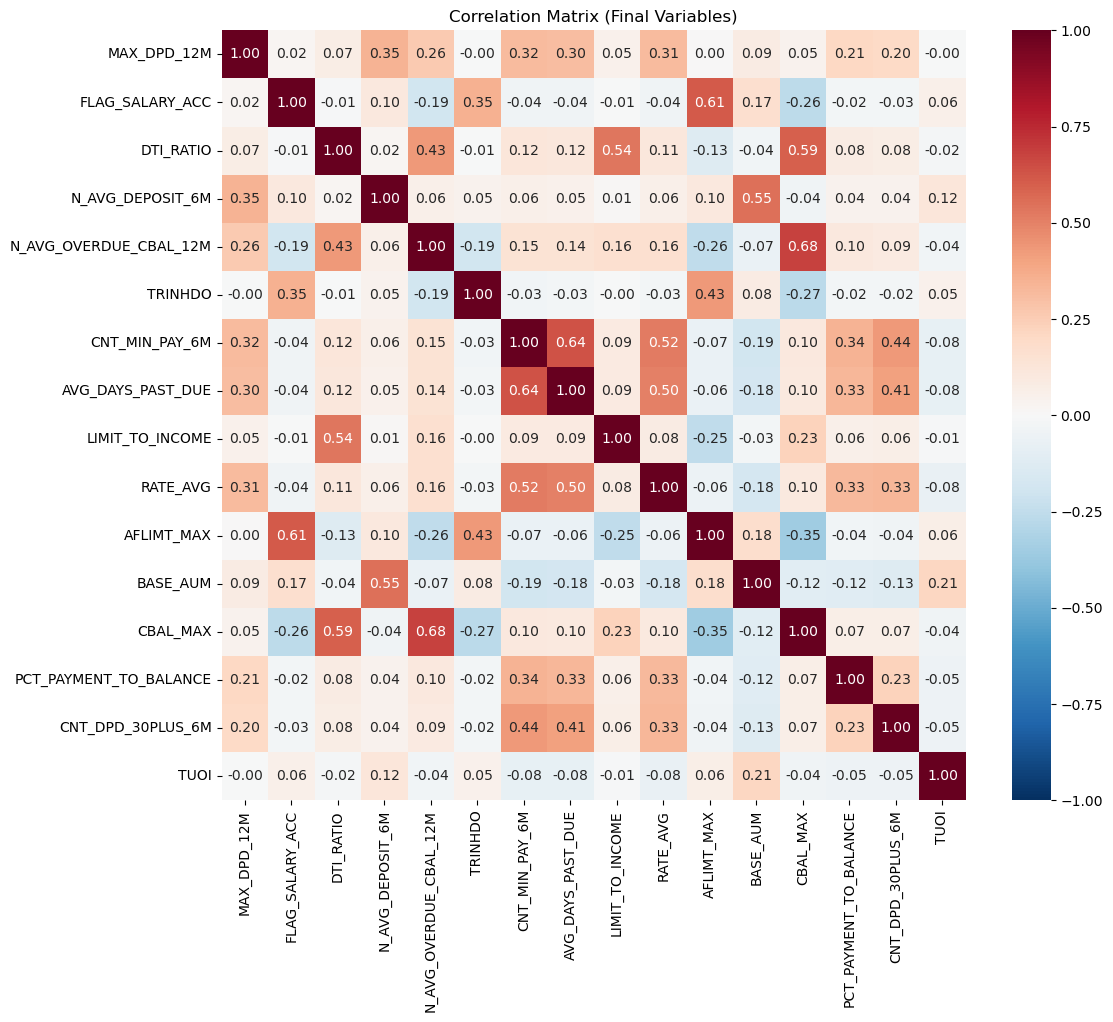

In [59]:
print("\n[BƯỚC 4] Kiểm tra tương quan và loại bỏ biến (Threshold = 0.7, Ưu tiên DTI)...")

# --- 1. CHUẨN BỊ DANH SÁCH BIẾN ---
# Lấy danh sách các biến còn lại trong dictionary (đã được clean ở bước 3.5)
available_vars = list(binning_results.keys())

# Lấy IV để sắp xếp giảm dần
var_iv_list = []
for v in available_vars:
    iv = binning_results[v].binning_table.iv
    var_iv_list.append((v, iv))

# Sort: IV cao xếp trước
var_iv_list.sort(key=lambda x: x[1], reverse=True)
sorted_features = [x[0] for x in var_iv_list]

# --- LOGIC ƯU TIÊN: ĐƯA COLLATERAL_VALUE LÊN ĐẦU ---
# priority_var = "COLLATERAL_VALUE"
# if priority_var in sorted_features:
#     sorted_features.remove(priority_var)
#     sorted_features.insert(0, priority_var)
#     print(f"  -> Đã đưa biến '{priority_var}' lên vị trí ưu tiên số 1.")
# else:
#     print(f"  -> Cảnh báo: '{priority_var}' không nằm trong danh sách biến (có thể đã bị loại vì IV quá thấp).")

# --- 2. TÍNH TOÁN WOE ---
print(f"  -> Đang tính toán WoE cho {len(sorted_features)} biến...")
df_woe = pd.DataFrame()

for feature in sorted_features:
    try:
        optb = binning_results[feature]
        
        # Preprocessing (Quan trọng: phải khớp với lúc train)
        is_categorical = (optb.dtype == "categorical")
        x_raw = train[feature].copy()
        
        if is_categorical:
            x_clean = x_raw.astype(str).replace('nan', 'Missing').fillna("Missing")
        else:
            x_clean = x_raw # Numerical
            
        # Transform sang WoE
        df_woe[feature] = optb.transform(x_clean, metric="woe")
        
    except Exception as e:
        print(f"  -> Lỗi transform biến {feature}: {e}")

# --- 3. TÍNH MA TRẬN TƯƠNG QUAN & LỌC ---
corr_matrix = df_woe.corr(method='pearson')

kept_vars = []
dropped_log = []

print(f"  -> Bắt đầu lọc tương quan...")

for candidate in sorted_features:
    is_kept = True
    reason = "Initial"
    
    # So sánh biến ứng viên với các biến ĐÃ ĐƯỢC GIỮ
    for existing_var in kept_vars:
        # Lấy hệ số tương quan
        r = corr_matrix.loc[candidate, existing_var]
        
        # Nếu tương quan quá cao (>= 0.7)
        if abs(r) >= 0.7:
            is_kept = False
            reason = f"Corr với {existing_var} (r={r:.2f})"
            break # Dừng kiểm tra, loại luôn
            
    if is_kept:
        kept_vars.append(candidate)
    else:
        # Lưu log
        candidate_iv = binning_results[candidate].binning_table.iv
        dropped_log.append({
            "Variable": candidate,
            "IV": candidate_iv,
            "Reason": reason
        })

# ============================================================
# HIỂN THỊ KẾT QUẢ
# ============================================================
print(f"\n=== KẾT QUẢ SAU KHI LỌC ĐA CỘNG TUYẾN ===")
print(f"Tổng biến đầu vào: {len(sorted_features)}")
print(f"Số biến giữ lại:   {len(kept_vars)}")
print(f"Số biến bị loại:   {len(dropped_log)}")

# 1. Danh sách bị loại
if dropped_log:
    print("\n>>> DANH SÁCH BIẾN BỊ LOẠI (CORRELATION > 0.7):")
    df_dropped = pd.DataFrame(dropped_log)
    display(df_dropped.style.format({"IV": "{:.4f}"}))

# 2. Danh sách giữ lại
print("\n>>> DANH SÁCH BIẾN CUỐI CÙNG (FINAL SELECTION):")

# Tạo bảng tổng hợp thông tin cho các biến được giữ
final_summary_data = []
for v in kept_vars:
    optb = binning_results[v]
    
    # Lấy thông tin binning để hiển thị cho đẹp
    bt = optb.binning_table.build()
    bt_clean = bt[bt['Bin'].astype(str) != 'Totals']
    valid_bins = bt_clean[bt_clean['Count'] > 0]
    
    final_summary_data.append({
        "Variable": v,
        "IV": optb.binning_table.iv,
        "Min_Bin_Pct": valid_bins['Count (%)'].min() if not valid_bins.empty else 0,
        "Max_Bin_Pct": valid_bins['Count (%)'].max() if not valid_bins.empty else 0
    })

df_final = pd.DataFrame(final_summary_data)
# Sort lại theo IV giảm dần để dễ nhìn
df_final = df_final.sort_values("IV", ascending=False).reset_index(drop=True)

display(df_final.style.format({
    "IV": "{:.4f}",
    "Min_Bin_Pct": "{:.2%}",
    "Max_Bin_Pct": "{:.2%}"
}))

# 3. Vẽ Heatmap (Chỉ vẽ nếu số lượng biến <= 30 để nhìn cho rõ)
if len(kept_vars) <= 30:
    plt.figure(figsize=(12, 10))
    sns.heatmap(df_woe[kept_vars].corr(), annot=True, fmt=".2f", cmap="RdBu_r", vmin=-1, vmax=1)
    plt.title("Correlation Matrix (Final Variables)")
    plt.show()

LASSO REGRESSION 

In [ ]:
# ============================================================
# CẤU HÌNH TOÀN CỤC (CHỈNH 1 LẦN Ở ĐÂY)
# ============================================================
TARGET_LASSO_VARS = 15      # Số lượng biến giữ lại sau Lasso
BRUTE_FORCE_K_MIN = 8       # Số biến tối thiểu trong mô hình final
BRUTE_FORCE_K_MAX = 15      # Số biến tối đa
N_JOBS            = 15      # Số luồng CPU chạy song song
TARGET_COL        = target_col # Tên biến target (đã define ở đầu notebook)

# ============================================================
# BƯỚC 5: LỌC BIẾN BẰNG LASSO (PHIÊN BẢN SILENT)
# ============================================================
print(f"\n[BƯỚC 5] Chạy Lasso Regression (Giữ lại Top {TARGET_LASSO_VARS} biến)...")

# 1. Chuẩn bị dữ liệu WoE (Chạy ngầm)
X_woe_lasso = pd.DataFrame()
for feature in kept_vars:
    try:
        optb = binning_results[feature]
        x_raw = train[feature].astype(str).replace('nan', 'Missing').fillna("Missing") if optb.dtype == "categorical" else train[feature]
        X_woe_lasso[feature] = optb.transform(x_raw, metric="woe")
    except: pass

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_woe_lasso)
y = train[TARGET_COL]

# 2. Ranking biến (Chạy 1 lần duy nhất)
lr = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', random_state=42)
lr.fit(X_scaled, y)
coefs_abs = np.abs(lr.coef_[0])

# 3. Lấy Top biến
df_imp = pd.DataFrame({'Variable': kept_vars, 'Imp': coefs_abs}).sort_values('Imp', ascending=False)
final_vars_lasso = df_imp.head(TARGET_LASSO_VARS)['Variable'].tolist()

# Đảm bảo DTI (Force keep)
# if "DTI_RATIO" in kept_vars and "DTI_RATIO" not in final_vars_lasso:
#     final_vars_lasso.pop()
#     final_vars_lasso.append("DTI_RATIO")

kept_vars = final_vars_lasso # Cập nhật biến toàn cục
print(f"  -> Đã xong. Danh sách {len(kept_vars)} biến được chọn: {kept_vars}")


[BƯỚC 5] Chạy Lasso Regression (Giữ lại Top 15 biến)...
  -> Đã xong. Danh sách 15 biến được chọn: ['MAX_DPD_12M', 'FLAG_SALARY_ACC', 'DTI_RATIO', 'N_AVG_OVERDUE_CBAL_12M', 'TRINHDO', 'TUOI', 'N_AVG_DEPOSIT_6M', 'CBAL_MAX', 'LIMIT_TO_INCOME', 'AFLIMT_MAX', 'AVG_DAYS_PAST_DUE', 'PCT_PAYMENT_TO_BALANCE', 'RATE_AVG', 'BASE_AUM', 'CNT_DPD_30PLUS_6M']


In [61]:
# ============================================================
# BƯỚC 6: CHUẨN BỊ DỮ LIỆU FINAL (TRANSFORM ALL)
# ============================================================
print(f"\n[BƯỚC 6] Transform toàn bộ dữ liệu (Train/OOS/OOT) sang WoE...")

def transform_woe_silent(df, cols, binning_dict):
    out = pd.DataFrame()
    for c in cols:
        optb = binning_dict[c]
        x = df[c].astype(str).replace('nan', 'Missing').fillna("Missing") if optb.dtype == "categorical" else df[c]
        out[c] = optb.transform(x, metric="woe")
    return out

X_train_final = transform_woe_silent(train, kept_vars, binning_results)
X_oos_final   = transform_woe_silent(oos, kept_vars, binning_results)
X_oot_final   = transform_woe_silent(oot, kept_vars, binning_results)
y_train_full  = train[TARGET_COL]

# Tính sẵn Std Dev để tính Weight
std_devs = X_train_final.std()
print("  -> Đã chuẩn bị xong dữ liệu.")


[BƯỚC 6] Transform toàn bộ dữ liệu (Train/OOS/OOT) sang WoE...
  -> Đã chuẩn bị xong dữ liệu.


In [62]:
# ============================================================
# BƯỚC 7: VÉT CẠN TỔ HỢP (BRUTE-FORCE OPTIMIZED)
# ============================================================
print(f"\n[BƯỚC 7] Chạy Brute-force ({BRUTE_FORCE_K_MIN}-{BRUTE_FORCE_K_MAX} biến) trên {N_JOBS} luồng CPU...")

# Worker Function
def process_combo(cols_idx, feature_names, X_data, y_data, stds):
    vars_names = feature_names[list(cols_idx)]
    X_sub = X_data[vars_names]
    
    # Fit
    clf = LogisticRegression(penalty='l2', C=1e9, solver='liblinear', random_state=42)
    clf.fit(X_sub, y_data)
    coefs = clf.coef_[0]
    
    # Check 1: Dấu
    if np.any(coefs >= 0): return None
    
    # Check 2: Weight (3% - 35%)
    imp = np.abs(coefs * stds[vars_names].values)
    total = imp.sum()
    if total == 0: return None
    w = (imp / total) * 100
    if np.any(w < 3) or np.any(w > 35): return None
    
    # Check 3: Gini > 50%
    pred = clf.predict_proba(X_sub)[:, 1]
    gini = 2 * roc_auc_score(y_data, pred) - 1
    if gini < 0.3: return None
    
    return (len(vars_names), list(vars_names), coefs, w, gini)

# Main Loop
feature_names_arr = np.array(kept_vars)
combos = []
for k in range(BRUTE_FORCE_K_MIN, min(BRUTE_FORCE_K_MAX, len(kept_vars)) + 1):
    combos.extend(itertools.combinations(range(len(kept_vars)), k))

print(f"  -> Tổng số mô hình cần kiểm tra: {len(combos)}")
print("  -> Đang xử lý (vui lòng chờ)...")

# Chạy song song (verbose=1: Chỉ hiện progress bar gọn gàng)
results = Parallel(n_jobs=N_JOBS, verbose=1)(
    delayed(process_combo)(c, feature_names_arr, X_train_final, y_train_full, std_devs) for c in combos
)

valid_models = [r for r in results if r is not None]
print(f"  -> Hoàn tất! Tìm thấy {len(valid_models)} mô hình đạt chuẩn.")


[BƯỚC 7] Chạy Brute-force (8-15 biến) trên 15 luồng CPU...
  -> Tổng số mô hình cần kiểm tra: 16384
  -> Đang xử lý (vui lòng chờ)...


[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    6.8s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:   21.9s
[Parallel(n_jobs=15)]: Done 420 tasks      | elapsed:   47.9s
[Parallel(n_jobs=15)]: Done 770 tasks      | elapsed:  1.4min
[Parallel(n_jobs=15)]: Done 1220 tasks      | elapsed:  2.2min
[Parallel(n_jobs=15)]: Done 1770 tasks      | elapsed:  3.1min
[Parallel(n_jobs=15)]: Done 2420 tasks      | elapsed:  4.1min
[Parallel(n_jobs=15)]: Done 3170 tasks      | elapsed:  5.4min
[Parallel(n_jobs=15)]: Done 4020 tasks      | elapsed:  6.7min
[Parallel(n_jobs=15)]: Done 4970 tasks      | elapsed:  8.1min
[Parallel(n_jobs=15)]: Done 6020 tasks      | elapsed:  9.6min
[Parallel(n_jobs=15)]: Done 7170 tasks      | elapsed: 11.6min
[Parallel(n_jobs=15)]: Done 8420 tasks      | elapsed: 14.0min
[Parallel(n_jobs=15)]: Done 9770 tasks      | elapsed: 16.4min
[Parallel(n_jobs=15)]: Done 11220 tasks      

  -> Hoàn tất! Tìm thấy 898 mô hình đạt chuẩn.


[Parallel(n_jobs=15)]: Done 16384 out of 16384 | elapsed: 29.3min finished


In [63]:
# ============================================================
# BƯỚC 8: CHỌN MÔ HÌNH TỐT NHẤT & VALIDATE
# ============================================================
if valid_models:
    # Convert to DF & Sort
    df_res = pd.DataFrame(valid_models, columns=['Num_Vars', 'Vars', 'Coefs', 'Weights', 'Gini_Train'])
    df_res = df_res.sort_values('Gini_Train', ascending=False).reset_index(drop=True)
    
    # Lấy Best Model (Rank 1)
    best_row = df_res.iloc[0]
    best_vars = best_row['Vars']
    
    print(f"\n[BƯỚC 8] KẾT QUẢ FINAL (Mô hình Rank 1/Top {len(valid_models)})")
    print("-" * 60)
    print(f"Danh sách biến ({len(best_vars)}): {best_vars}")
    
    # Validate OOS/OOT
    def get_gini(X, y, model_cols, model_obj):
        # Lưu ý: model_obj là Logit của statsmodels nên cần add_constant
        X_new = sm.add_constant(X[model_cols])
        pred = model_obj.predict(X_new)
        return 2 * roc_auc_score(y, pred) - 1

    # Fit lại bằng Statsmodels để ra report đẹp
    X_train_best = sm.add_constant(X_train_final[best_vars])
    final_logit = sm.Logit(y_train_full, X_train_best).fit(disp=0)
    
    # Tính Gini các tập
    g_train = 2 * roc_auc_score(y_train_full, final_logit.predict(X_train_best)) - 1
    
    X_oos_best = sm.add_constant(X_oos_final[best_vars])
    g_oos = 2 * roc_auc_score(oos[TARGET_COL], final_logit.predict(X_oos_best)) - 1
    
    X_oot_best = sm.add_constant(X_oot_final[best_vars])
    g_oot = 2 * roc_auc_score(oot[TARGET_COL], final_logit.predict(X_oot_best)) - 1
    
    # In bảng kết quả gọn đẹp
    print("-" * 60)
    print(f"{'METRIC':<10} | {'VALUE':<10} | {'NOTES'}")
    print("-" * 60)
    print(f"{'Gini Train':<10} | {g_train:.2%}    |")
    print(f"{'Gini OOS':<10} | {g_oos:.2%}    | Diff: {g_train - g_oos:.2%}")
    print(f"{'Gini OOT':<10} | {g_oot:.2%}    | Diff: {g_train - g_oot:.2%}")
    print("-" * 60)
    
    if (g_train - g_oos > 0.1) or (g_train - g_oot > 0.1):
        print("⚠️ CẢNH BÁO: Có dấu hiệu Overfitting!")
    else:
        print("✅ KẾT QUẢ TỐT: Mô hình ổn định.")

    # In bảng hệ số và trọng số
    print("\n>>> CHI TIẾT BIẾN & TRỌNG SỐ:")
    res_detail = pd.DataFrame({
        'Variable': best_vars,
        'Coef': final_logit.params.drop('const').values,
        'P-value': final_logit.pvalues.drop('const').values,
        'Weight(%)': best_row['Weights']
    }).sort_values('Weight(%)', ascending=False)
    
    display(res_detail.style.format({
        'Coef': '{:.4f}', 'P-value': '{:.4f}', 'Weight(%)': '{:.2f}'
    }))
    
else:
    print("❌ Không tìm thấy mô hình nào thỏa mãn tiêu chí.")


[BƯỚC 8] KẾT QUẢ FINAL (Mô hình Rank 1/Top 898)
------------------------------------------------------------
Danh sách biến (9): [np.str_('FLAG_SALARY_ACC'), np.str_('DTI_RATIO'), np.str_('N_AVG_OVERDUE_CBAL_12M'), np.str_('TRINHDO'), np.str_('TUOI'), np.str_('N_AVG_DEPOSIT_6M'), np.str_('AVG_DAYS_PAST_DUE'), np.str_('PCT_PAYMENT_TO_BALANCE'), np.str_('RATE_AVG')]
------------------------------------------------------------
METRIC     | VALUE      | NOTES
------------------------------------------------------------
Gini Train | 46.86%    |
Gini OOS   | 48.33%    | Diff: -1.47%
Gini OOT   | 46.98%    | Diff: -0.12%
------------------------------------------------------------
✅ KẾT QUẢ TỐT: Mô hình ổn định.

>>> CHI TIẾT BIẾN & TRỌNG SỐ:


,Variable,Coef,P-value,Weight(%)
2,N_AVG_OVERDUE_CBAL_12M,-0.8897,0.0000,19.34
0,FLAG_SALARY_ACC,-0.9340,0.0000,18.04
5,N_AVG_DEPOSIT_6M,-0.7818,0.0000,17.86
1,DTI_RATIO,-0.6131,0.0000,14.11
3,TRINHDO,-0.5429,0.0000,8.81
6,AVG_DAYS_PAST_DUE,-0.5169,0.0000,6.80
8,RATE_AVG,-0.4700,0.0000,6.59
4,TUOI,-0.7133,0.0000,4.95
7,PCT_PAYMENT_TO_BALANCE,-0.3544,0.0000,3.50


In [64]:
# ============================================================
# BƯỚC CUỐI (SỬA ĐỔI): Tự tạo ID nếu không có CASE_ID
# ============================================================

# 1. Reset index để lấy Index làm ID (đặt tên là CASE_ID cho thống nhất)
train_reset = train.reset_index().rename(columns={'index': 'CASE_ID'})
oos_reset   = oos.reset_index().rename(columns={'index': 'CASE_ID'})
oot_reset   = oot.reset_index().rename(columns={'index': 'CASE_ID'})

# Đánh dấu nguồn (để sau này tính Gini riêng)
train_reset['DATA_TYPE'] = 'TRAIN'
oos_reset['DATA_TYPE']   = 'OOS'
oot_reset['DATA_TYPE']   = 'OOT'

# 2. Chọn biến ID thực tế (Nếu bạn có SOCIF thì dùng SOCIF, không thì dùng cái CASE_ID vừa tạo)
ID_COL = "SOCIF" if "SOCIF" in train.columns else "CASE_ID"

# 3. Gộp dữ liệu
# Lưu ý: Thêm DATA_TYPE vào export để sau này tính Gini riêng từng tập
needed_cols = [ID_COL, "SEGMENT", "DATA_TYPE", TARGET_COL] + best_vars
df_full_seg = pd.concat([
    train_reset[needed_cols] if ID_COL == "CASE_ID" else train[needed_cols], 
    oos_reset[needed_cols] if ID_COL == "CASE_ID" else oos[needed_cols], 
    oot_reset[needed_cols] if ID_COL == "CASE_ID" else oot[needed_cols]
], axis=0).reset_index(drop=True)

# 4. Transform & Predict (Giữ nguyên)
X_woe_full = pd.DataFrame()
for col in best_vars:
    optb = binning_results[col]
    x_raw = df_full_seg[col].astype(str).replace('nan', 'Missing').fillna("Missing") if optb.dtype == "categorical" else df_full_seg[col]
    X_woe_full[col] = optb.transform(x_raw, metric="woe")

X_final = sm.add_constant(X_woe_full)
df_full_seg['PREDICTED_PROB'] = final_logit.predict(X_final)

# 5. Xuất file (QUAN TRỌNG: Đã thêm cột DATA_TYPE)
# Xuất thêm DATA_TYPE để tí nữa gộp 3 file lại vẫn biết đâu là Train/OOS/OOT
output_cols = [ID_COL, "SEGMENT", "DATA_TYPE", TARGET_COL, "PREDICTED_PROB"]
output_filename = f"seg2_result.parquet"

df_full_seg[output_cols].to_parquet(output_filename, index=False)
print(f"-> Đã xuất file (kèm DATA_TYPE): {output_filename}")

-> Đã xuất file (kèm DATA_TYPE): seg2_result.parquet


In [65]:
df_res.to_parquet("seg2_top_model.parquet")